In [1]:
from IPython import display

Eric Martin, Kassidy Barram, Matt Young

# Introduction

### Proposed Research

The original plan for this term project was to create an algorithmic stock trading bot that could make buy and sell decisions for Bitcoin. However, the scope of this original project was too vast to be completed in the time frame allotted for this term project. Therefore, the project that we ended up completing was a Neural Network Model that predicts the next day’s price of Bitcoin to assist with buy and sell decisions. 

The plan to implement the stock trading bot was to use a neural network and reinforcement learning. We were going to train this bot using 3 types of data. This data was going to consist of stock market trends, public sentiment regarding related topics, and the frequency of keywords and phrases relating to cryptocurrency and overall stock market trends. 

Once the data had been collected, the structure of the project for the training of the bot was going to closely follow the structure laid out in the research conducted by Coliani et. al. In this research, they first began by implementing a single Deep Q-Network before attempting to add the dueling architecture to train the bot. When training had concluded, we were going to end the project by performing experiments utilizing the Coinbase-Pro API which provides a coin-trading sandbox. This sandbox would allow us to test the trading bots functionality in a real-world environment, but without the potential monetary risk which could be incurred if the bot was used in a real market environment. 

### Challenges & Contigency Plan

From the beginning we understood that creating a stock trading bot was going to be a challenge. Due to this, we established a contingency plan where we would use a Neural Network to perform predictions for the next day’s price of Bitcoin. This Neural Network contingency plan is what was implemented for this project. 

The initial steps involved in the execution for the contingency plan were to gather data which would be used as input for our Neural Network. The data that we ended up using consisted of search trends and financial data. Despite several attempts, we were unable to collect the sentiment data. We then performed several experiments using different implementations of neural networks, hidden layer structures, optimizers, and input data manipulations to try to determine a configuration that resulted in a model that could `accurately predict the next day’s price of Bitcoin`.

### Context

The context of our stated goal to `develop a neural network which can accurately predict the next day’s price of Bitcoin` is the global crypto market. This research could be useful for people trying to use machine learning to increase their wealth by day trading, learn more about the global movement of cryptocurrencies, and by researchers interested in crypto at large. We believe that our findings could, with some further work, be generalized to other cryptocurrencies (Etherium, LiteCoin, etc...).

### Scripts & Experiment Code

You will find our data collection scripts and experiment code in this folder. You will also find all of our raw data in *csv* format.

### Outline

Our methods for data collection follow, with each team member's data collection efforts labeled and discussed. After data collection we describe the experiments performed by each team member (again listed by name). Each experiment section includes a brief discussion of results/findings. Finally we provide a conclusion which attempts to tie the threads of each team member's efforts together.

- Methods
  - Eric Martin's Data Collection
  - Kassidy Barram's Data Collection
  - Matt Young's Data Collection
- Results
  - Eric Martin's Experiments & Results
  - Kassidy Barram's Experiments & Results
  - Matt Young's Experiments & Results
- Conclusion
- References

# Methods

## Eric Martin's Data Collection

 ### Training Data

 
 The historical price data for Bitcoin (BTC) was downloaded from Yahoo Finance from September 13th,2017 to October 31st, 2022. 
 
 The historical financial data for Tether (USDT), a digital token backed by fiat currency (see their whitepaper [here]( https://assets.ctfassets.net/vyse88cgwfbl/5UWgHMvz071t2Cq5yTw5vi/c9798ea8db99311bf90ebe0810938b01/TetherWhitePaper.pdf)) was downloaded from November 06th, 2017 to October 31st, 2022. The date November 06th, 2017 was the first day the asset hit the market so we could not collect data as far back as we did for Bitcoin. 
 
 For Bitcoin, the historical data we decided to use were:
 
    'Open', 'High', 'Low', 'Close', and 'Volume'

whereas with USDT we only collected:

    'Volume'

Since Tether is a cryptocurrency pegged to the US Dollar, which means its value is linked to the US Dollar and it is often used as a safe haven investment. As such, it could possibly be used to gauge the sentiment of the market and provide an indication of possible future Bitcoin price movements. If the volume of USDT spikes positively, this may indicate that people are uncertain about the future of BTC and other cryptocurrency assets and be moving money into Tether. On the other hand, an increase in volume could mean that people are moving money into the crypto space. Either way, it seemed a valuable input to consider.


### Realworld Current Data Inputs

For use of the network, rather than downloading a CSV file of the historical data directly from Yahoo Finance, we implemented a class that utilizes *yfinance*, an unofficial open-source tool that uses Yahoo's publicly available APIs to grab any historical price information when needed.

### Feature Engineering

Aside from the 6 financial features collected through Yahoo Finance we added 21 more financial statistical values based off of the 6 collected values. 

These 21 calculated features are as follows:

    'Delta_BTC_Close', Delta_BTC_Volume','EMA3', 'EMA7', 'EMA14', 'EMA20', 'EMA50', 'USDT_Volume', 'Delta_USDT_Volume', 'USDT_ Volatility', 'Yesterday_BTC_Close_Price', '3day_Past_Mean_BTC_Price', '7day_Past_Mean_BTC_Price', 'Yesterday_BTC_Volume', '3day_Past_Mean_BTC_Volume', '7day_Past_Mean_BTC_Volume', 'Yesterday_USDT_Volume', '3day_Past_Mean_USDT_Volume', '7day_Past_Mean_USDT_Volume', 'RSI', 'RSI_BuySellFlag', and 'EMA_BuySellFlag'.


1) The 'Delta' columns contain the slope of the value of the feature from yesterday to today to allow the network to have knowledge of past events and their current trajectory. 

2) The 'Yesterday' and 'Past' columns contain metrics involving previous days' data. Including historical metrics allows us to provide the network with a pseudo-memory without having to utilize a long short-term memory network model which we had determined to be outside of our scope. 

3) The 'EMA' features contain the exponential moving average data for Bitcoin. The exponential moving average (EMA) is a technical analysis tool used to smooth out short-term price fluctuations and highlight longer-term trends in price action. The EMA assigns a greater weight to recent prices relative to older prices in the calculation, resulting in a more responsive indicator that is better suited for identifying recent trends. The EMA is used to identify support and resistance levels, identify entry and exit points, and assess overall market sentiment. We decided to use EMA as opposed to the traditional moving average (MA) for this reason due to the volatility of the cryptocurrency market. Another reason we decided on EMA vs the traditional moving average is that MA produces NaN values equal to the length of the average calculated since it relies on a finite number of prior data points to calculate the average. However, the exponential moving average uses an exponentially decreasing weighting factor for each prior data point, so there is no need for a finite number of prior data points, and therefore it does not produce NaN values which means we did not have to drop data points, albeit it wouldn't really matter with the number of data points we are using. 

The EMA is traditionally calculated as follows:

    EMA = Closing price x multiplier + EMA (previous day) x (1-multiplier)

where the multiplier is calculated as:
    
        multiplier = 2 / (number of days + 1)

4) The 'EMA_BuySellFlag' was calculated by comparing the daily close price to the EMA. When the daily close price crosses the EMA from below a buy signal is created. When the price crosses the EMA from above, a sell signal is created. The default EMA used for this calculation is the 20-day EMA as it seemed to give the greatest profit yield in tests. In the figure below, a green line signals a buy flag and a red line signals a sell flag. 

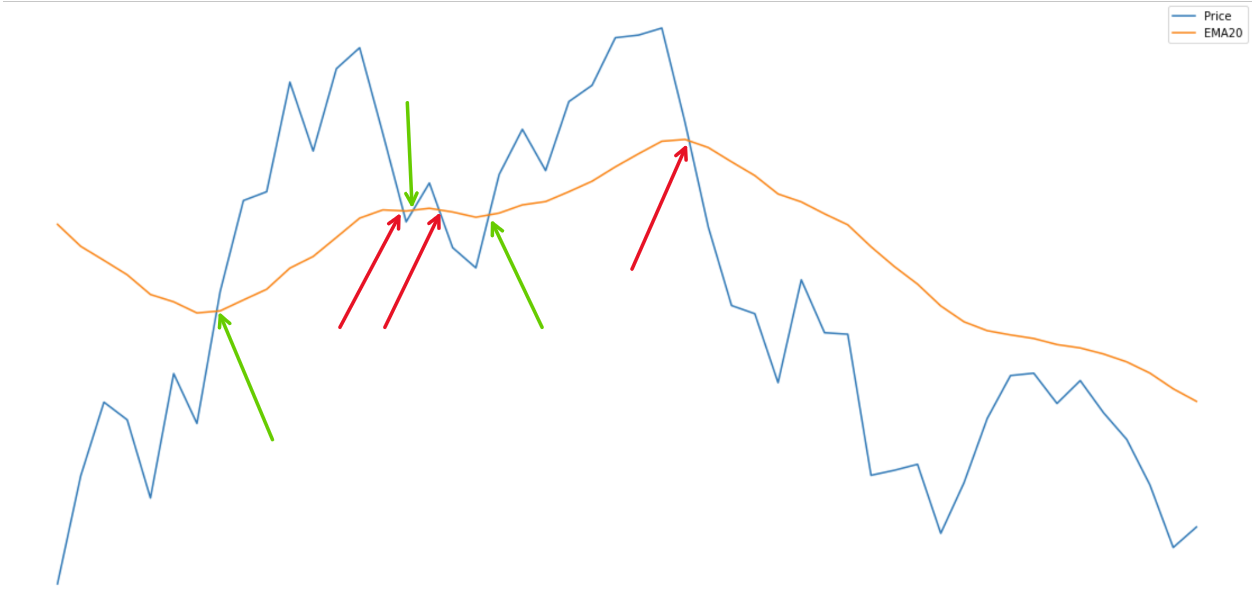

In [3]:
display.Image('./images/EMA_Cross_Example.png')

The 'Volatility' of USDT was added to give insight into how much movement is occurring between the cryptocurrency markets and Tether. Since Tether is a stablecoin, its volatility should stay quite low. If the volatility of USDT is high, this could indicate that the market is uncertain about the future of Bitcoin and other cryptocurrencies since this would indicate that people are moving money into Tether at a high rate or vice versa. A correlation matrix was created to determine the correlation between the volatility of USDT and the price of BTC and the results shows a large negative correlation which is expected since the price of BTC and the volatility of USDT should be inversely correlated. In the figure below, note that the volatility of USDT spikes up during a downtrend in the price of BTC and vice versa during an uptrend.

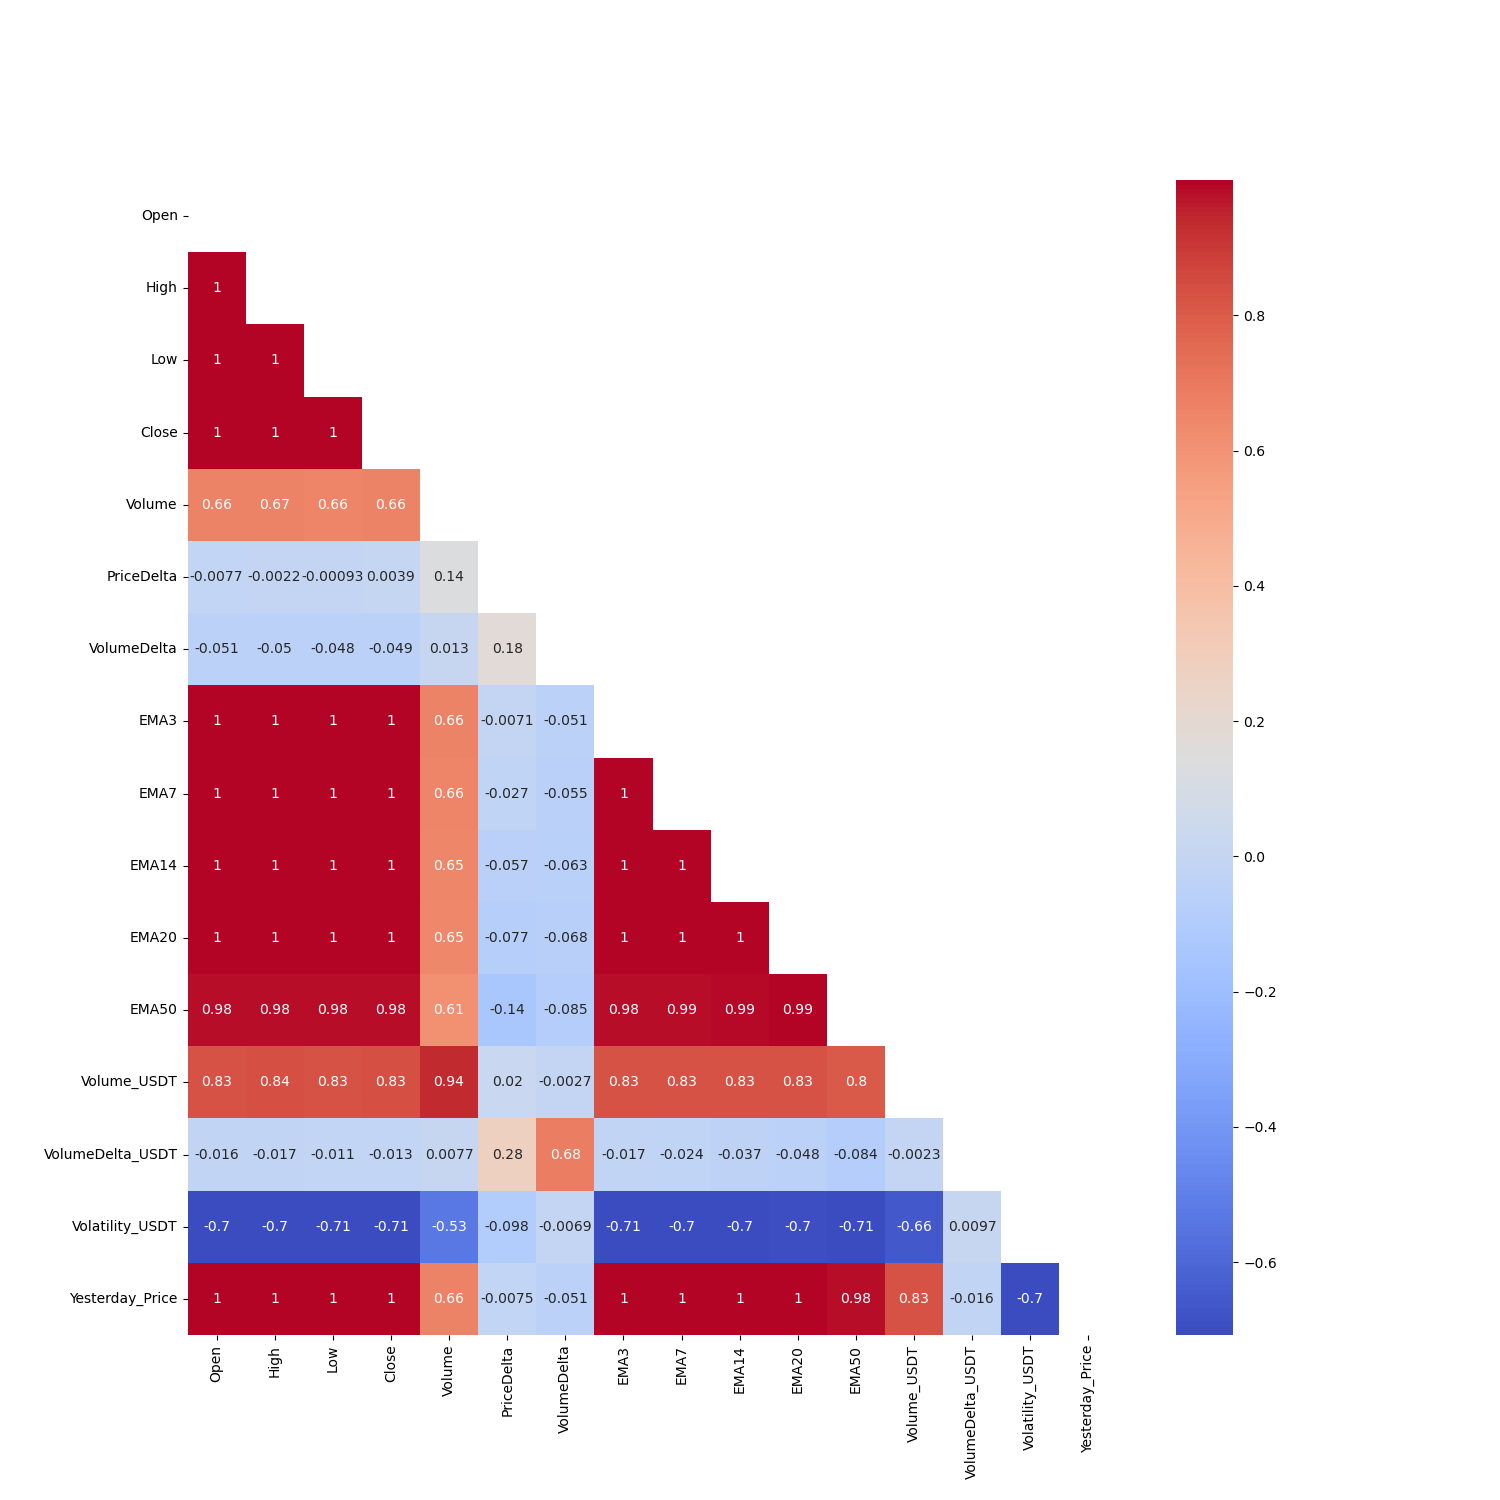

In [5]:
display.Image('./images/correlation_volatility.png')

The volatility of BTC was not directly calculated but was indirectly utilized using the relative strength index. The relative strength index (RSI) is a technical analysis indicator used to measure the magnitude of recent price changes to evaluate overbought or oversold conditions in the price of a stock or other asset. The RSI is displayed as an oscillator (a line graph that moves between two extremes) and can have a reading from 0 to 100. The 14-day RSI was calculated, and a buy signal was added to the current date if the RSI was less than 30 and the previous day's RSI was greater than 30, and a sell signal was added if the RSI was greater than 70 and yesterday's RSI was less than 70. A plot of the RSI is shown below.

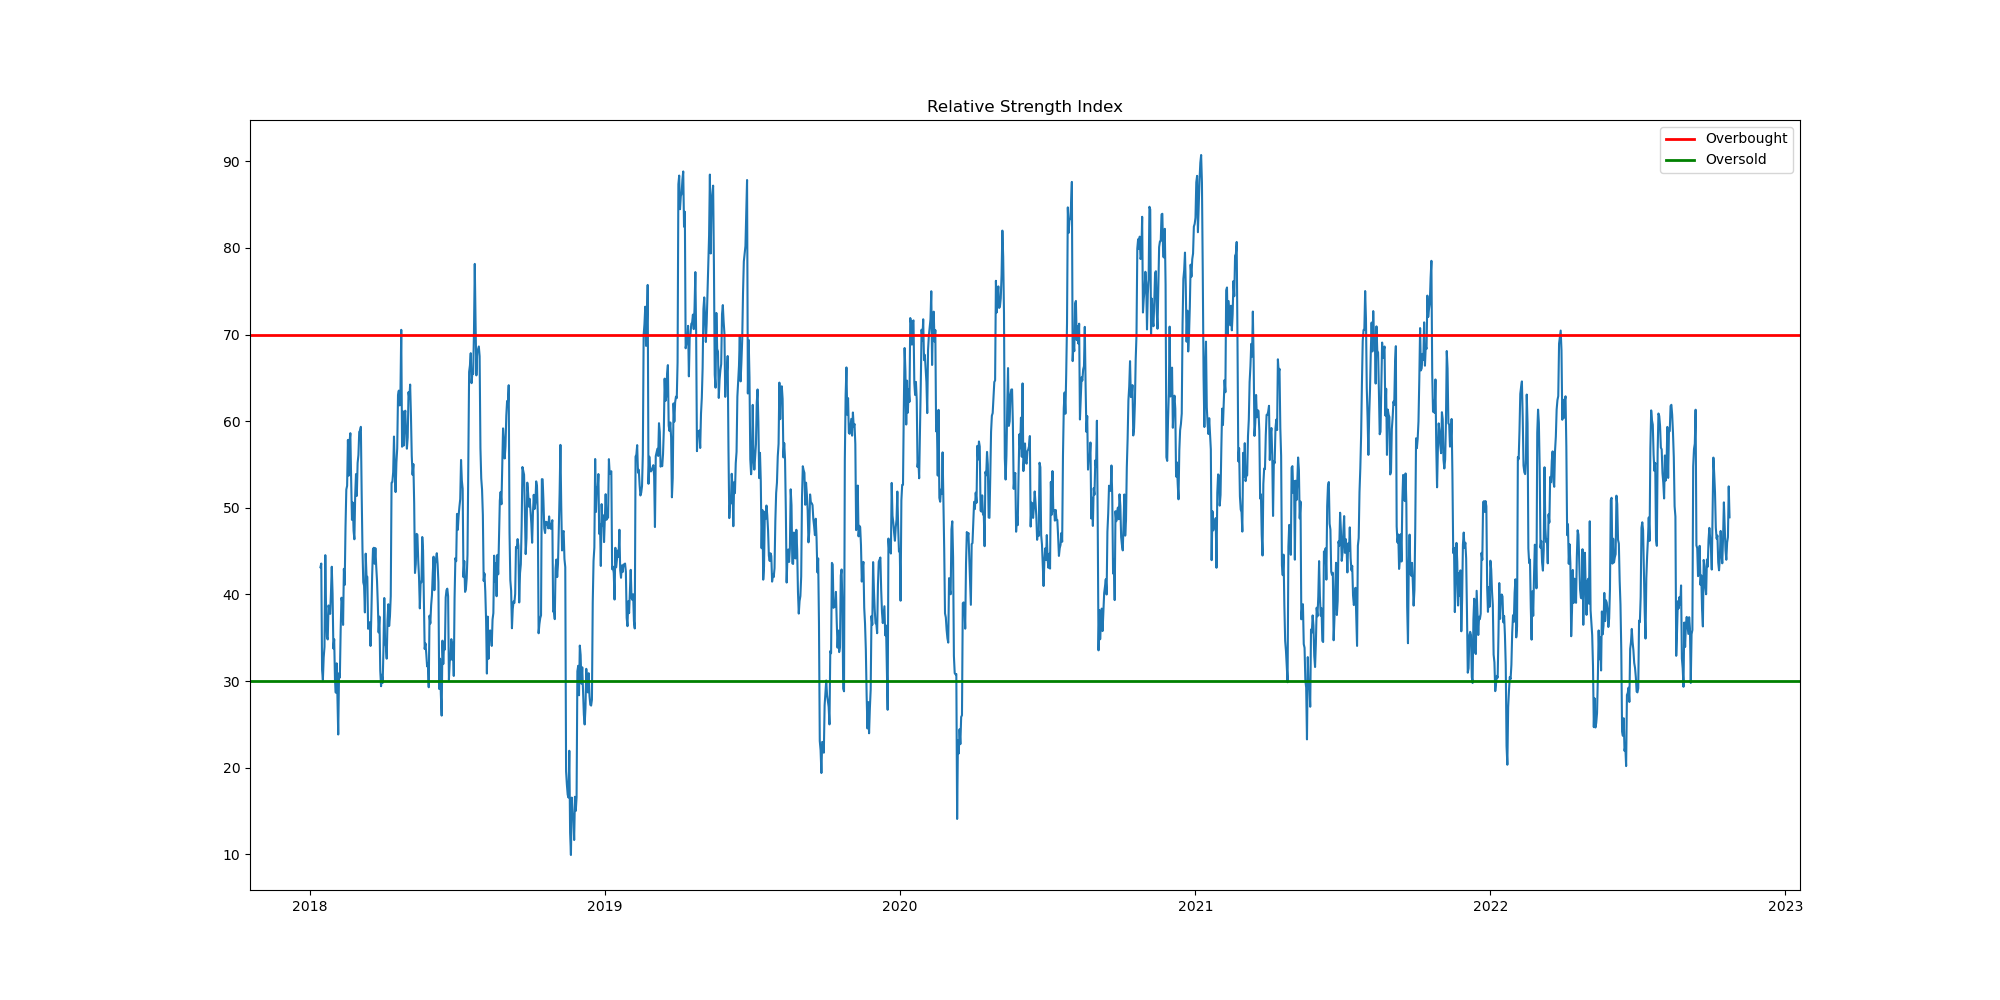

In [7]:
display.Image('./images/RSI.png')

#### *Note:*

*The buy and sell indicators based on the EMA and RSI were included in the features since we originally had planned on creating a reinforcement learning trading bot and wanted to give it access to technical analysis-based indicators. Even though our scope changed, we decided to retain these values.**

### Targets

Originally, we had planned on predicting the following targets:

    'next_day_BTC_price', 'three_day__BTC_price', 'seven_day__BTC_price', 'predicted_EMA_buy_sell_signal'

 We ended up deciding to stick with 'next_day_BTC_price' predictions in the end as this is a hard enough challenge, and predicting further in the future seemed quite untrustworthy due to the innate randomness of stocks and cryptocurrency prices. 
 
 The target ‘predicted_EMA_buy_sell_signal’ was going to be a binary classification that predicted if the EMA technical indicator would be triggered tomorrow whereas the other targets would have been continuous. In our first attempts, getting the network to predict both continuous and binary outputs was proving quite difficult so due to our time constraints, we decided to drop this target.

## Kassidy Barram's Data Collection

### Collection Process for Sentiment Data

The original plan for collecting the sentiment data involved using time-stamped news articles or tweets relating to technology, the stock market, or cryptocurrency as input to a pretrained machine learning model that specialized in financial data. The model that was going to be used is called FinBERT and is hosted on a site called huggingface. The finBERT model has 3 outputs: positive, negative, and neutral. Each of these outputs has an associated confidence value ranging from  0 - 1.  The max of these 3 confidence values would be interpreted as the overall sentiment for the article. This sentiment would then be collected into a file to be used as input for the main model used for our project. However, the attempts made to collect sentiment data did not go as planned. 

The process for collecting this sentiment data began by searching for pre-existing time series news or tweet datasets relating to the aforementioned topics that existed in the date range that we were using for our project (11/1/2017 - 10/31/2022). This search for datasets proved fruitless for several reasons. The primary reason, however, was that the range of dates needed for this project needed to span approximately 5 years, where most of this data was only available in 6 month ranges. 

Once the search for a pre-existing dataset was abandoned, an attempt was made to use the Twitter API to query for data that we could use for our project. Unfortunately, Twitter only allows access to its historical tweet data if an academic license has been obtained. Initially, this seemed promising, but the application for a license required documentation that no one on the team possessed. 

Next, we tried to use a historical news API called Aylien. The process to begin querying for data began by signing up for a 2 week free trial. From here, we began running into some issues. The initial queries showed that the API doesn’t allow full access to their historical data for users who are on their free trial. However, despite the fact that we wouldn’t be able to use the data collected from this API in our project, due to it not allowing us access to the full date range we needed, we still collected data from this website for the learning experience. 

The news data collected from Aylien already had associated sentiment values, which are displayed below. The sentiment data we queried for was for any news relating to the topics: Tesla, Apple, Moderna, and Pfizer. More relevant topics were inaccessible due to the limited access we had with our free trial. Once the data was collected and plotted, we noticed that data returned from the API was somewhat suspicious. The graphs illustrate that the sentiment returned from the API was the same for each topic queried for; this indicated to us that this API was providing erroneous data. 

In the end, we came to the decision that it would be best to redirect the effort and time being spent to gather sentiment data elsewhere. This fruitless endeavor to locate sentiment data illustrated to us that, although we live in a time where data is constantly being collected and stored for everything, it is often the case that usable data is not accessible to the average individual or student.


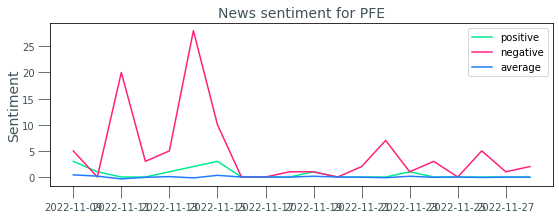

In [23]:
display.Image('./images/Pfizer.png')

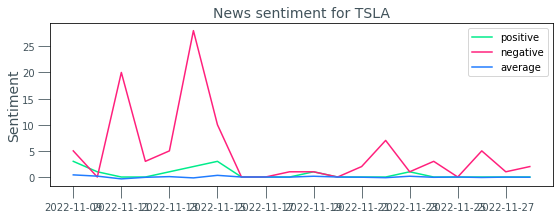

In [24]:
display.Image('./images/Tesla.png')

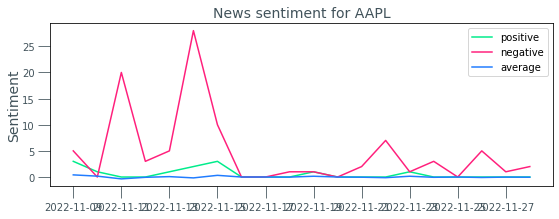

In [25]:
display.Image('./images/Apple.png')

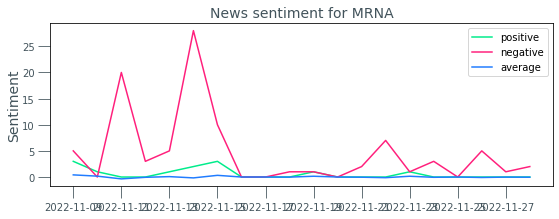

In [26]:
display.Image('./images/Moderna.png')

## Matt Young's Data Collection

### Motivation
We were interested in search trend data because Google search trends can tell us a lot about where public interest lies. If we see spikes in search terms like ‘Bitcoin’ and ‘Crypto Market’ on, say, the 15 of November 2019, we can reasonably conclude that on that date there is a high interest in these cryptocurrency. We are interested in these trends because we want to know if we can incorporate search trends into building a machine learning model to predict tomorrow’s stock prices.

There are a handful of reasons why this might be useful. Predicting stock prices could allow investors to make more money, give economists an idea of where the economy at large is heading, and alert consumers about potential threats to their economic well-being. We think that search trend data will be useful for building this predictive model.

We begin with 18 search terms: 'Bitcoin', 'Crypto', 'Cryptocurrency', 'ETH', 'Crypto Regulations', 'Crypto Ban', 'Crypto Bubble', 'Bull', 'Bear', 'Hack', 'Crypto Market', 'Stocks', 'Time to buy', 'should I sell', 'how to buy', 'exchange', 'wallet', 'mining', and finally 'blockchain'. The goal going into data collection was to cast a wide net. We do not intend on using all 18 of these search terms in training the final model, but we want to have options. We anticipate that some of these terms will be more predictive than others, and hope to weed out the less useful ones.

### Process

We use the pytrends API for accessing Google search trend data. This was installed using conda. The API has a word limit for keywords in a given request, so we broke our keyword list into 5 parts. 

- ['Bitcoin', 'Crypto', 'Cryptocurrency', 'ETH']
- ['Crytpo Regulations', 'Crypto Ban', 'Crypto Bubble', 'Bull']
- ['Bear', 'Hack', 'Crypto Market', 'Stocks']
- ['Time to buy', 'should I sell', 'how to buy']
- ['exchange', 'wallet', 'mining', 'blockchain']
  
In keeping with the rest of the data collection we maintained a temporal range of 2017-10/2022. We thought that five years would give us enough data to work with. We determined that one observation per day was a good middle ground between having enough data and having usable data. When we tried to get data every hour we ran into issues with data consistency.

We noticed that Google API has significant rate limiting built in and had to account for that by sleeping the script every few API calls. After collecting each month/year of data we wrote the data out to a file so that if the program crashed or needed to be restarted we wouldn’t lose all of our progress. Once we had every month/year that we needed we combined all the data and wrote that out to a file, to be eventually combined with the other data.


### Data Collection Results

We wound up with a csv file with 19 columns (18 search terms plus date as the index) and 2,130 rows. This file would eventually be loaded back into memory and combined with the financial data to construct our master input file used for training/testing/validating our neural network. Following is a graph of each search term over time.

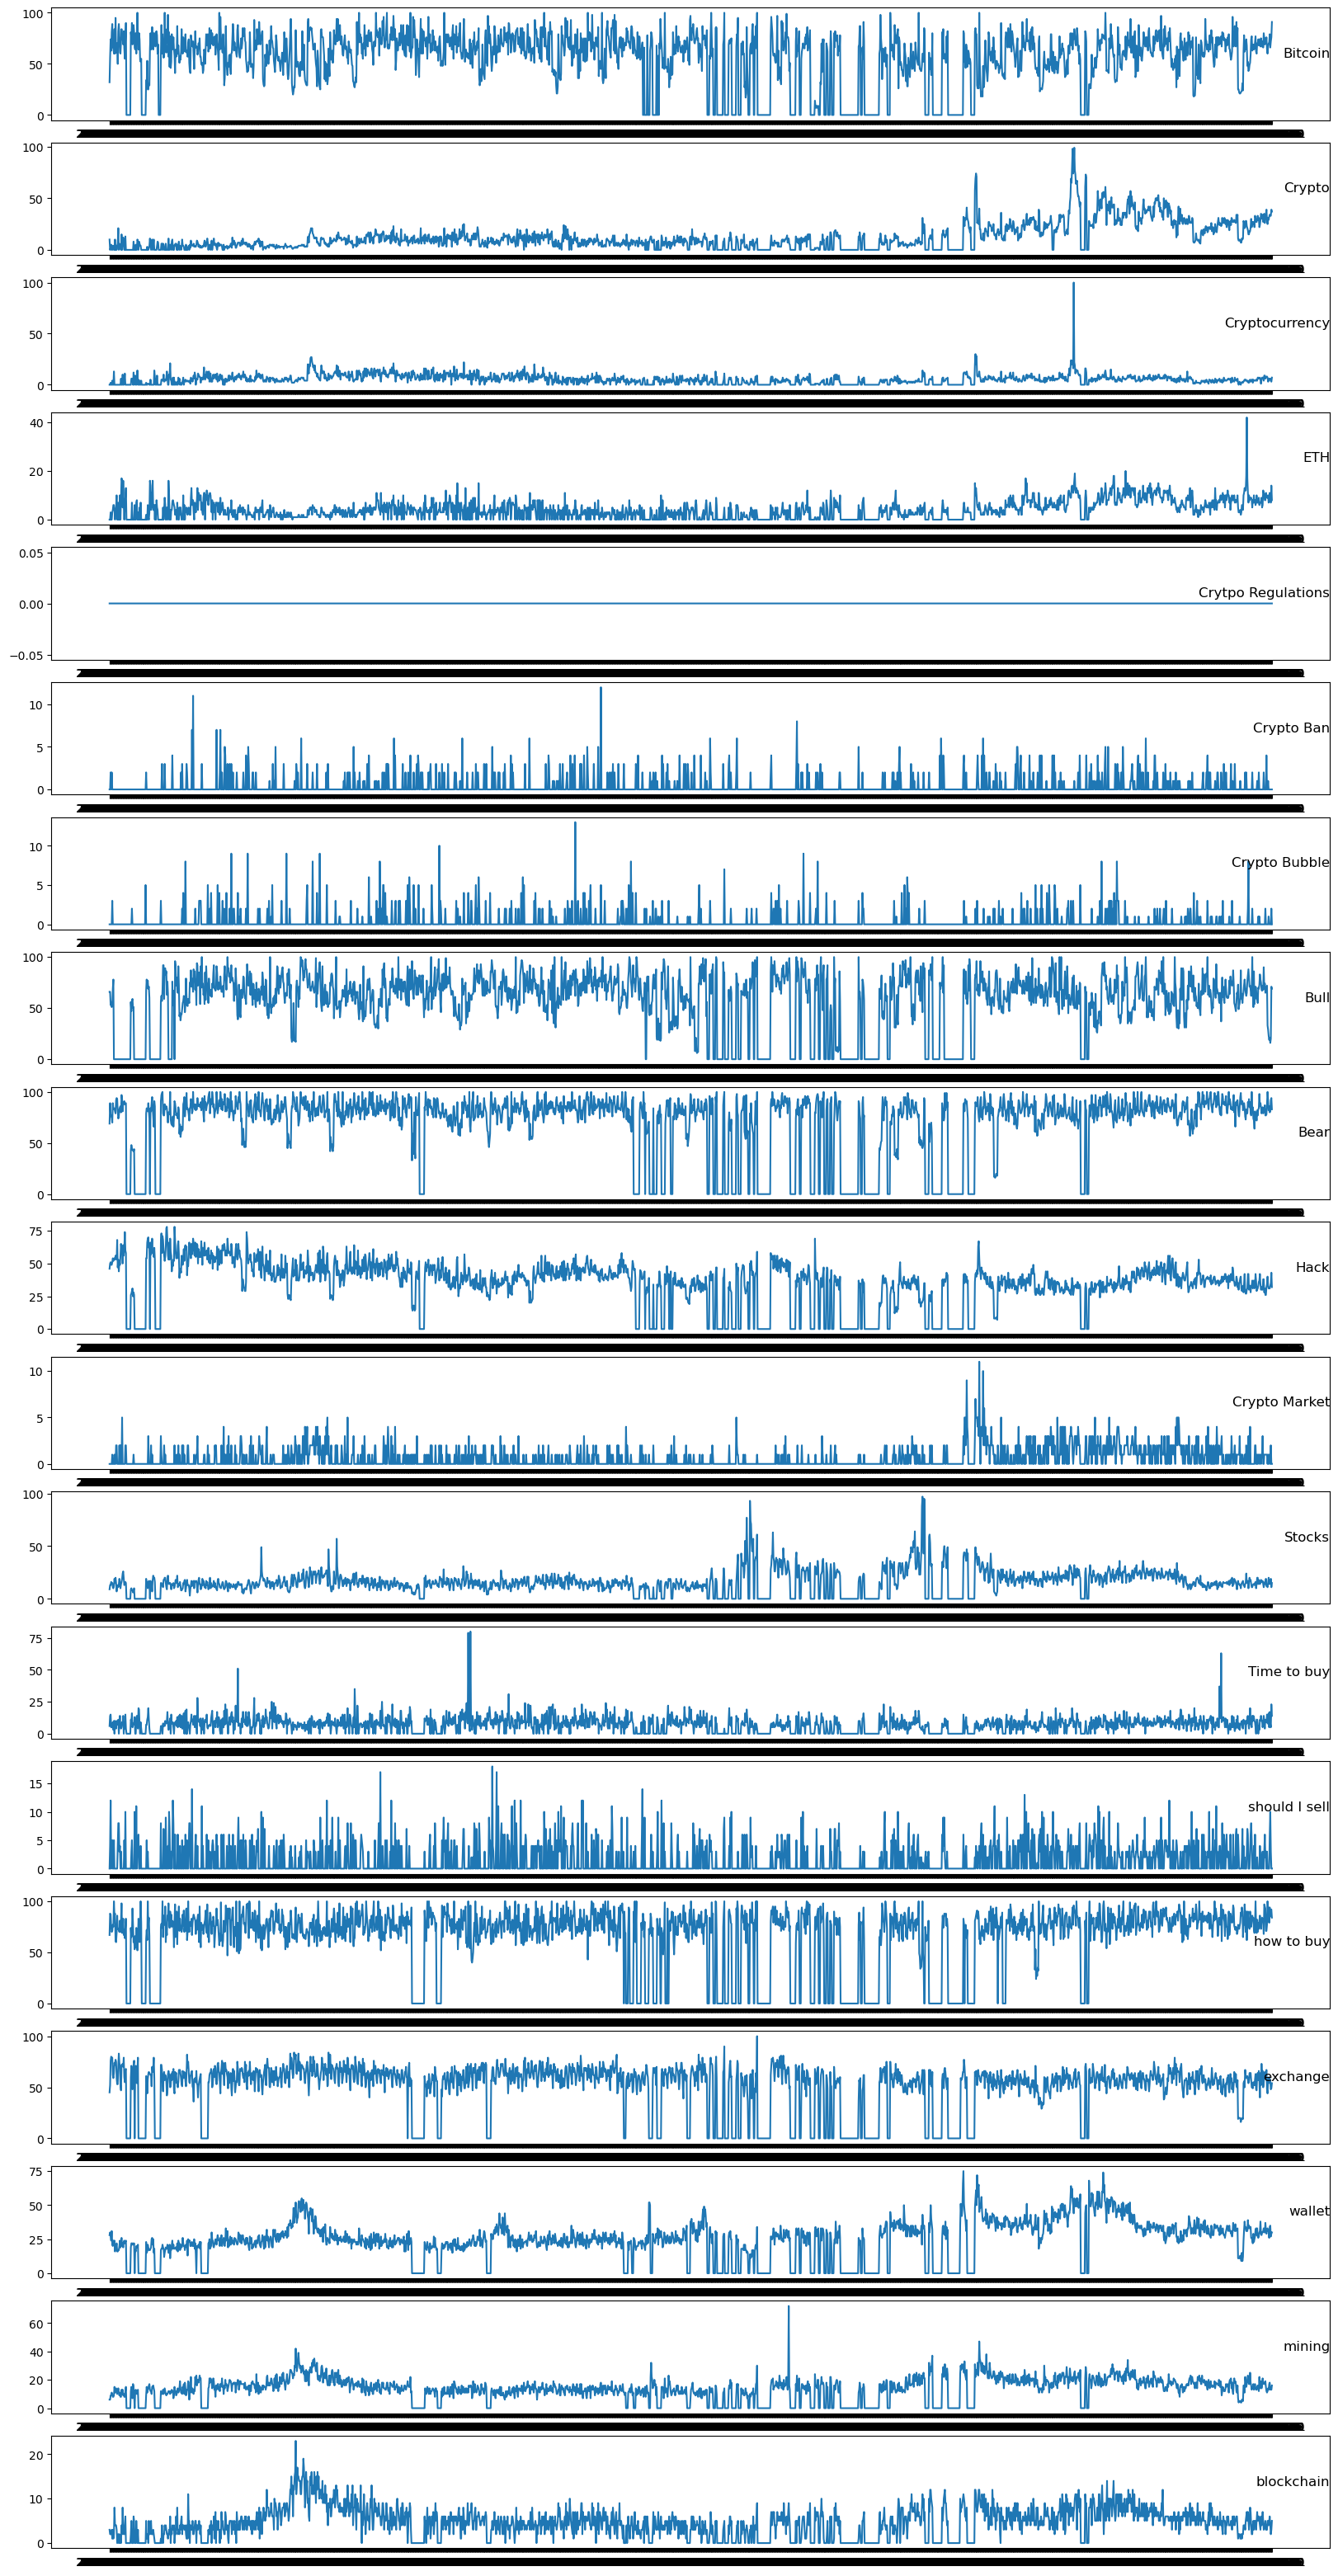

In [36]:
display.Image('./images/all_trends_plot.png')

## Notes about the charts

The search term prevalence is relative. A score of 100 means that the observation was made on a day with the highest search prevalence, and a score of 0 means that the observation was made on a day with the lowest search prevalence. It is worth mentioning that because we had to split up API calls in order to avoid rate limiting, this relative min/max scaling was reset each month, for each group of search terms. Thus, the value for 'Bitcoin' is unrelated to the value for 'should I sell', and the max for 'Time to buy' in any given month is unrelated to 'Time to buy' in any other month. This constitutes a real problem, and a possible threat to validity. However, due to the nature of the (free) API available to us it was unavoidable.

# Results

## Eric Martin's Experiments

### Methodology

For my experiment, I first decided to visualize the combined data that we had generated to get a better understanding of which features may hold more importance and which may be unnecessary. 

For this, I created a Jupyter notebook called ‘data_visualization.ipynb’ where I plotted the close price of BTC against the individual Google Search Trend results.

I then utilized a confusion matrix to determine which search trend queries had the greatest positive and negative correlations. I then did the same with the price features. I then removed features I deemed unnecessary and created a slimmer version of combined_data.csv. 

In my CSV I had removed the following features:

    'Cryptocurrency', 'Crytpo Regulations', 'Crypto Ban', 'Crypto Bubble', 'Bull', 'Bear', 'how to buy', 'exchange', 'RSI_BuySellFlag', 'EMA_BuySellFlag', 'Target_3Day', 'Target_7Day', 'Target_1Day_EMA_Signal', and all of the ‘Delta’ values (which will be explained below).


Then with the slimmed version of the CSV (combined_data_emartin_slimmed.csv), I followed the following data-cleaning steps:

1)	Set the date as the index
2)	Remove any rows with NaN values


I then proceeded to perform some data pre-processing:


1)	Create a function to gather the all-time high and low for BTC using the yfinance API
2)	Add the past day’s value and slope from yesterday to today’s value of each feature to the dataset. This is why I deleted the delta values from the original dataset. This increased the number of features from 32 to 98 (excluding the target).
3)	Split the dataframe into the data and targets. 
4)	Convert the two dataframes into numpy arrays.
5)	Create four standardization functions. Two of which standardize and de-standardize the input and two which standardize and de-standardize the target. The reasoning for this is discussed in the results section.
6)	Split the data into training and test sets without shuffling the time-series data. (75% train, 25% test)


I then built a Keras model with the following parameters:

    •	hidden_width = [64, 64, 64]        # number of neurons in the hidden layer
    •	instance = 1                       # instance number
    •	max_tries = 4                      # number of times to try training the model
    •	n_epochs = 1000                    # number of epochs to train the model
    •	batch_size = 30                    # batch size for training the model
    •	loss_fn = 'mse’                    # loss function to use
    •	dropout = False                    # dropout rate for the model
    •	optimizer = 'adam’                 # optimizer to use

The model summary is shown below:

    Model: "sequential_3"
    _________________________________________________________________
    Layer (type)                 Output Shape              Param #   
    =================================================================
    dense_12 (Dense)             (None, 64)                6400      
    _________________________________________________________________
    dense_13 (Dense)             (None, 64)                4160      
    _________________________________________________________________
    dense_14 (Dense)             (None, 64)                4160      
    _________________________________________________________________
    dense_15 (Dense)             (None, 1)                 65        
    =================================================================
    Total params: 14,785
    Trainable params: 14,785
    Non-trainable params: 0
    _________________________________________________________________


I then used the model to predict the test values and de-standardized the predictions and targets to get the actual values. I then plotted the predicted values against the actual values to get a visual representation of the model’s performance.

### Results

In this section, I will discuss the results of my experiment and the conclusions I have drawn from them.

#### Model Evaluation

The model was evaluated and the mean square error and mean absolute error were obtained.

    TEST MEAN SQUARE ERROR: 0.0006996 (0.07%)

    Test MEAN ABSOLUTE ERROR: 0.0192335 (1.92%)

The model was able to predict the next day’s BTC price with a mean absolute error of 1.92%. This sounds great but the most important factor is if it was correct in its prediction of tomorrow's price will increase or decrease since we are trying to predict the next day's price to determine if we should buy or sell.

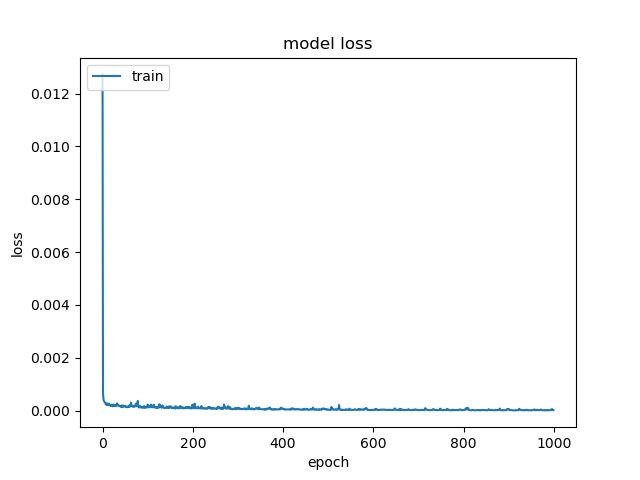

In [8]:
display.Image('./images/model_loss_1.png')

### Model Predictions

Here we plot the predicted values against the actual values to get a visual representation of the model’s performance for the train and test data.

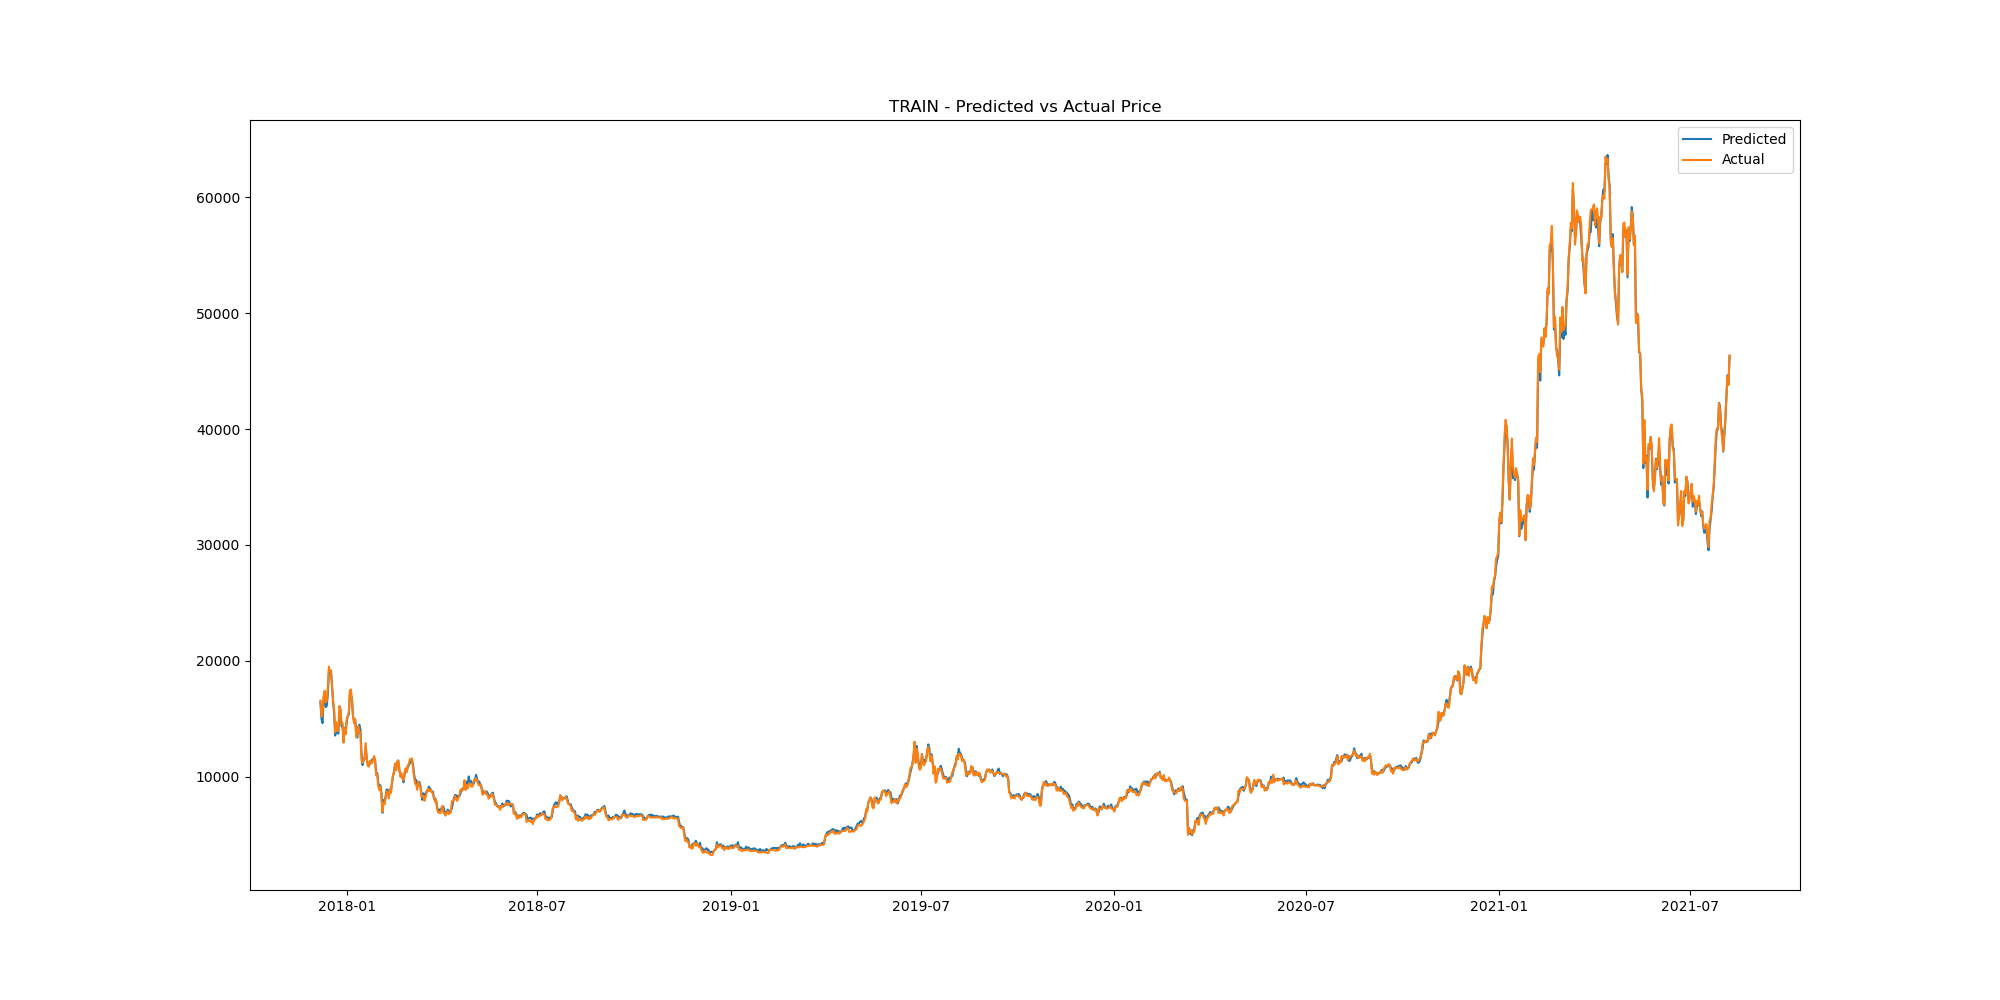

In [9]:
display.Image('./images/predicted_vs_actual_price_train_1.png')

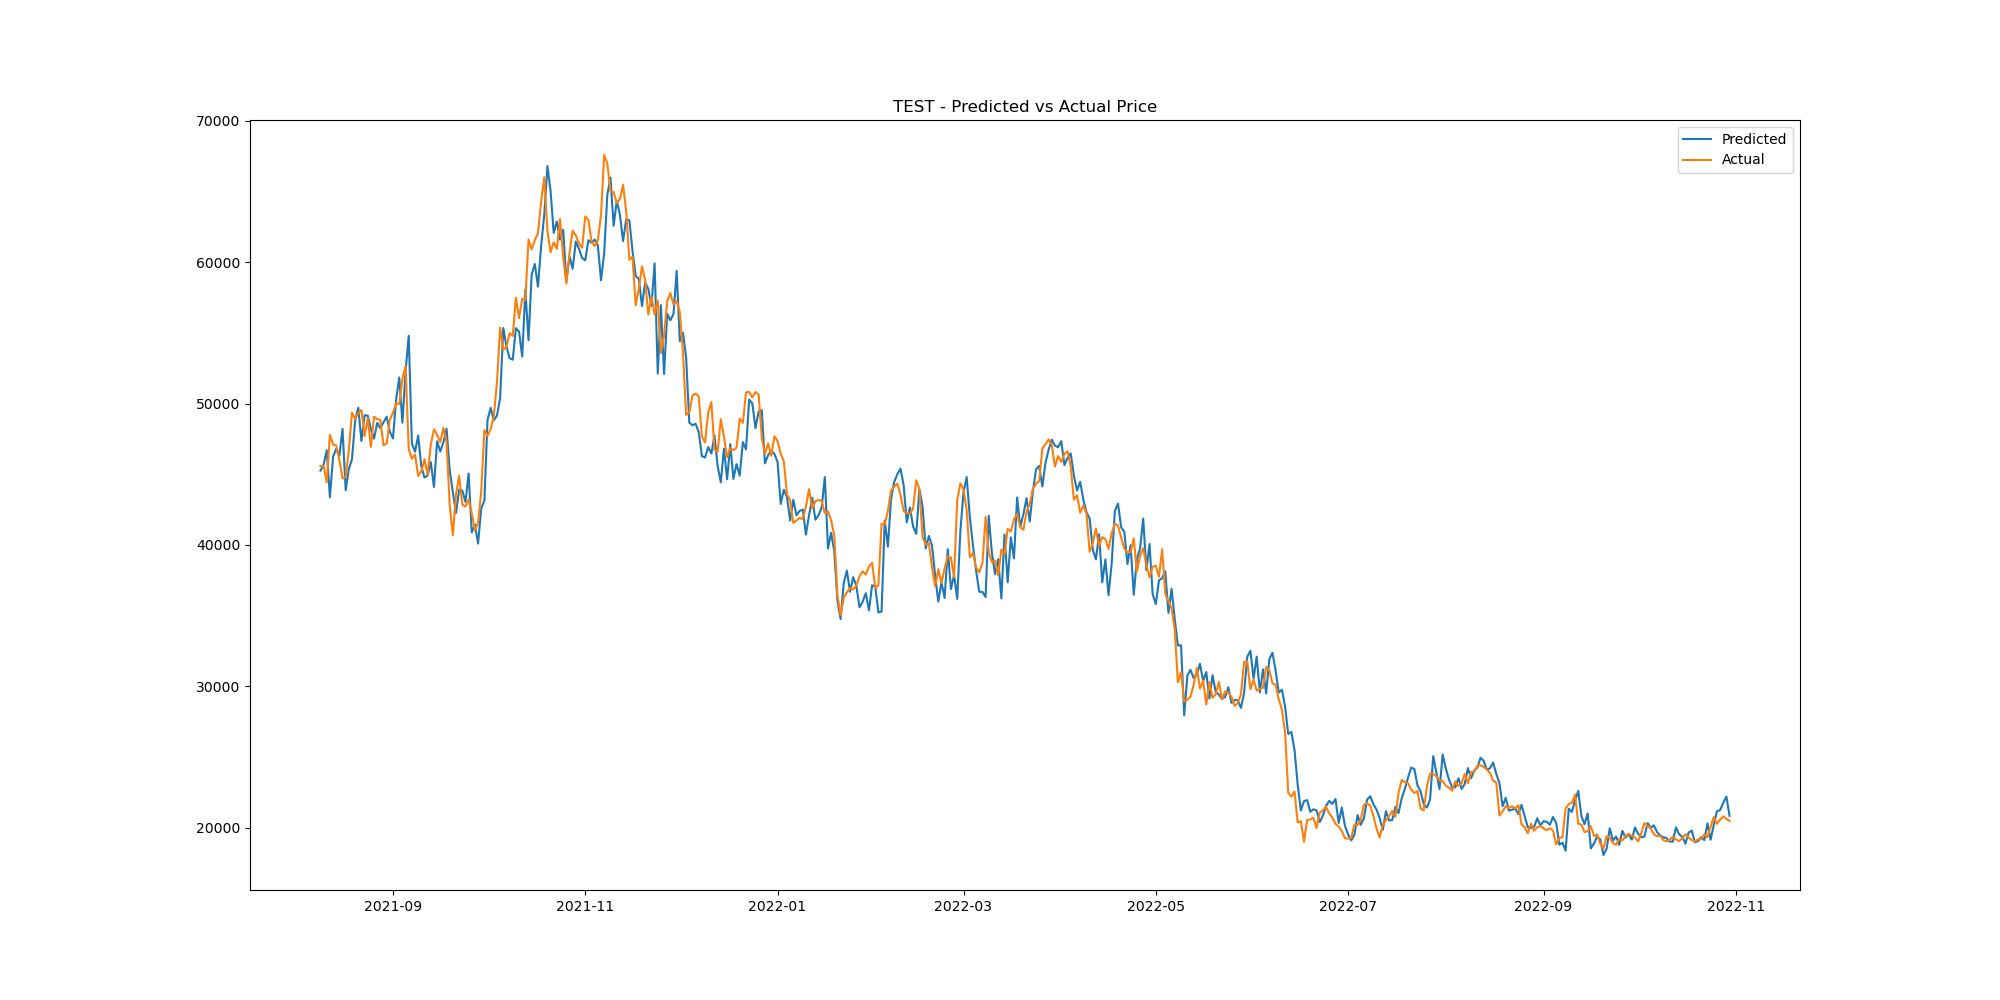

In [10]:
display.Image('./images/predicted_vs_actual_price_test_1.png')

Although the results for the test data look visually appealing in this plot, if we zoom into a smaller time frame, we can see that the model is not very accurate.

### Model Prediction (Zoomed In)

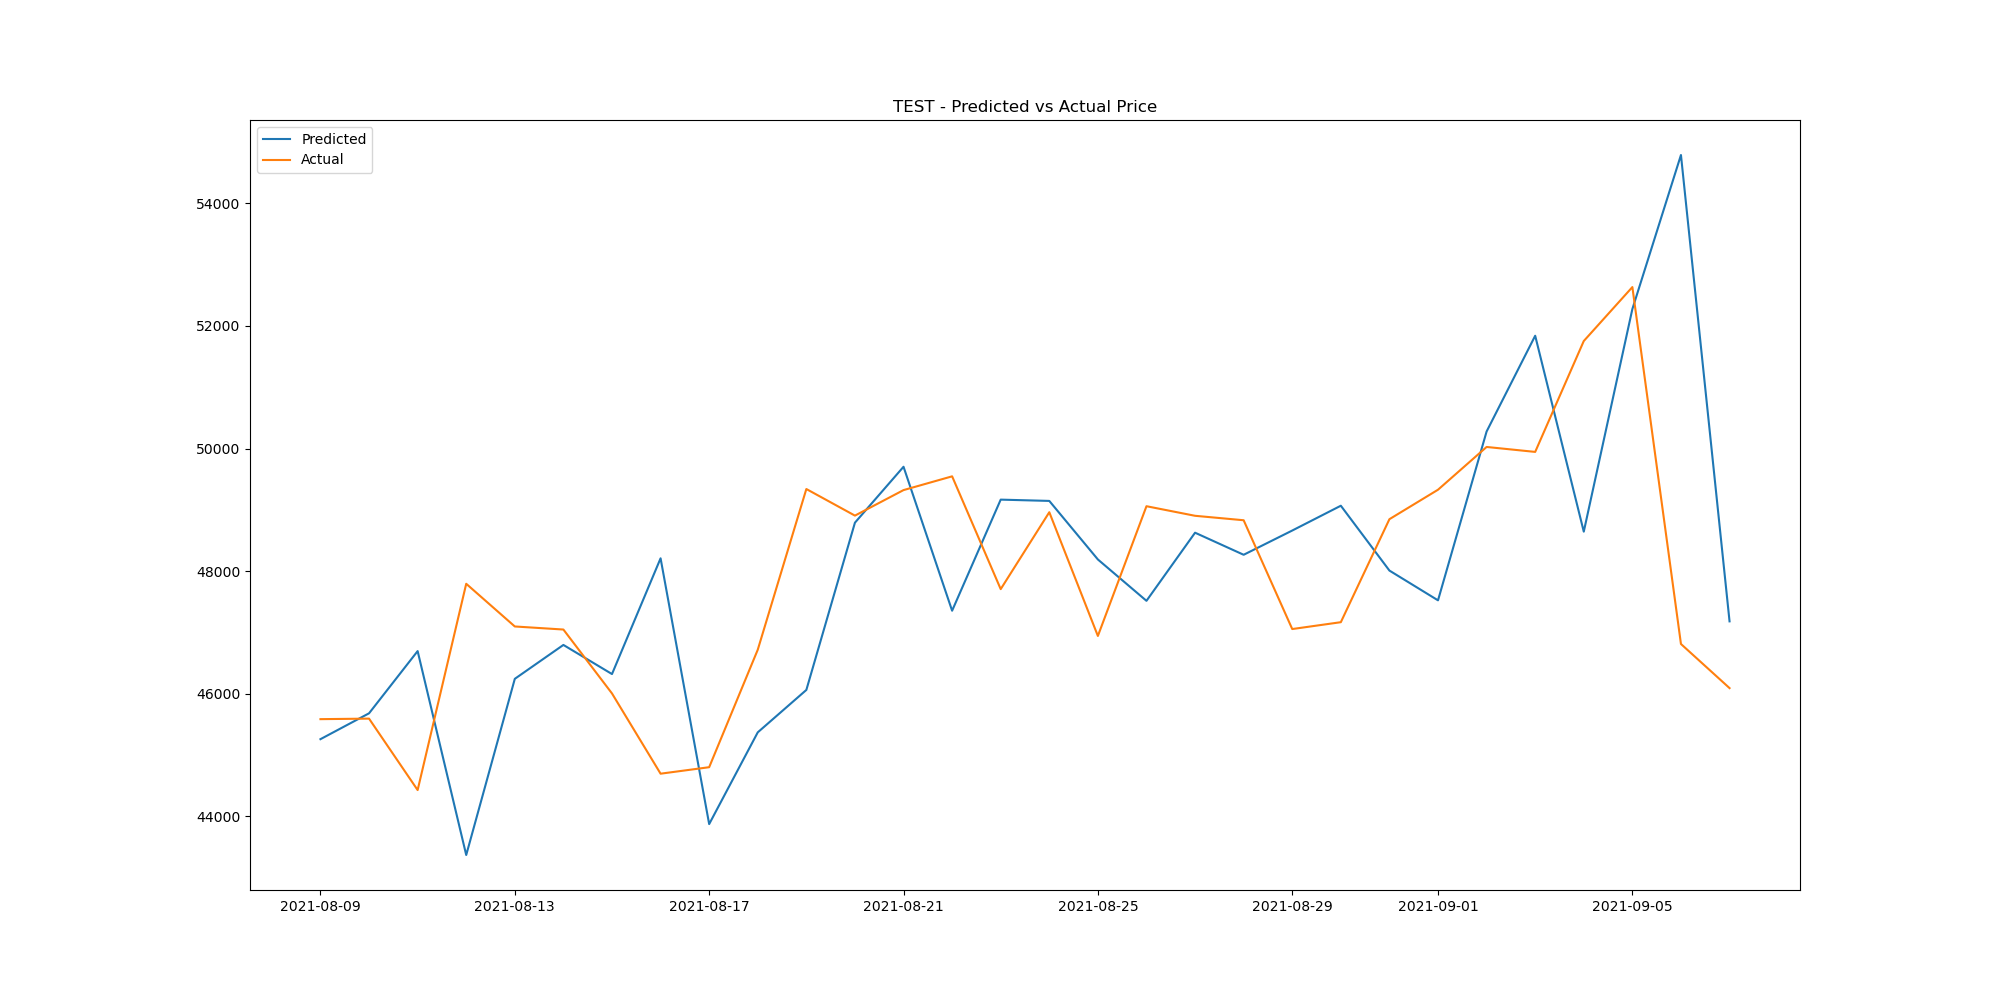

In [11]:
display.Image('./images/predicted_vs_actual_price_test_zoom_1.png')

### Difference Between Predicted and Actual Values for test data

Here we see the difference between the predicted and actual values for the test data. We can see that the model can have quite drastic differences in its predictions.

#### TEST PREDICTIONS:

Average absolute difference between predicted and actual values:

    $1319

Max difference between predicted and actual values:

    $7977

Min difference between predicted and actual values:

    $6

#### TRAIN PREDICTIONS:

Average absolute difference between predicted and actual values:

    $186

Max difference between predicted and actual values:

    $1909

Min difference between predicted and actual values:

    $0.30

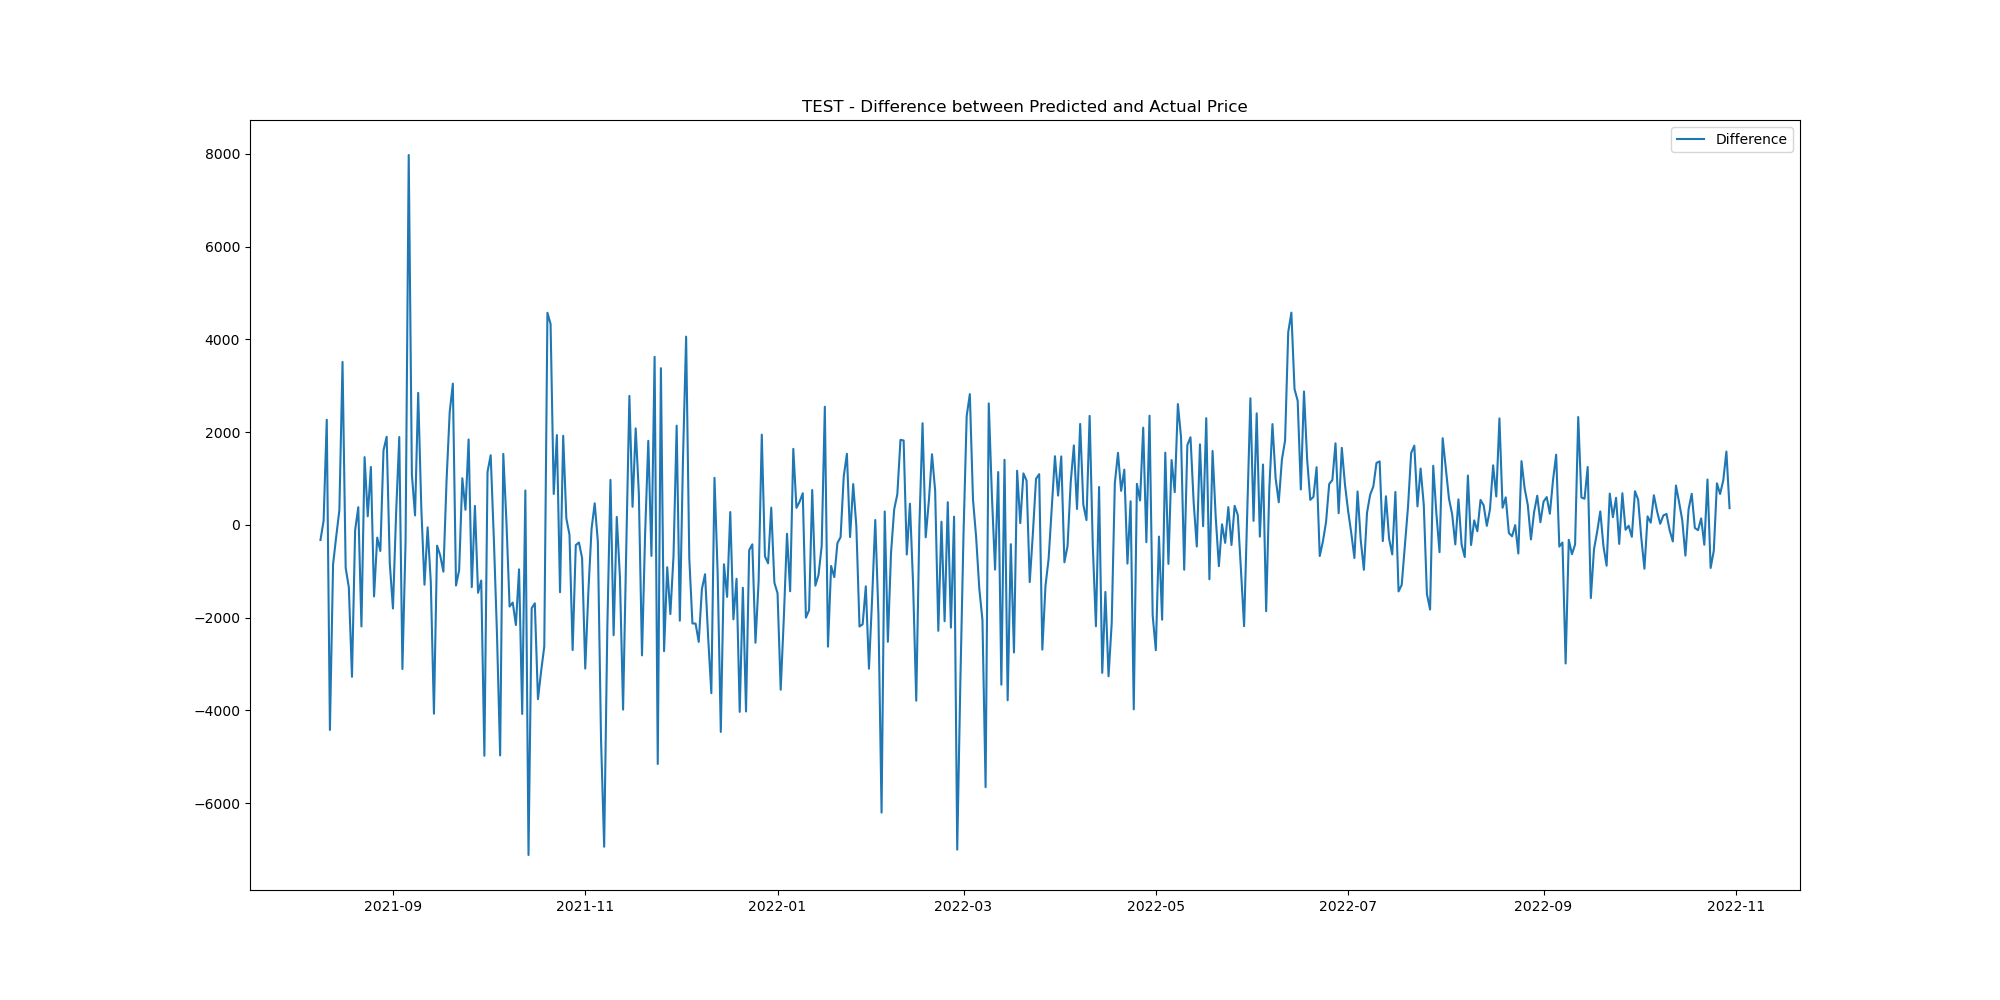

In [12]:
display.Image('./images/difference_between_predicted_and_actual_price_test_1.png')

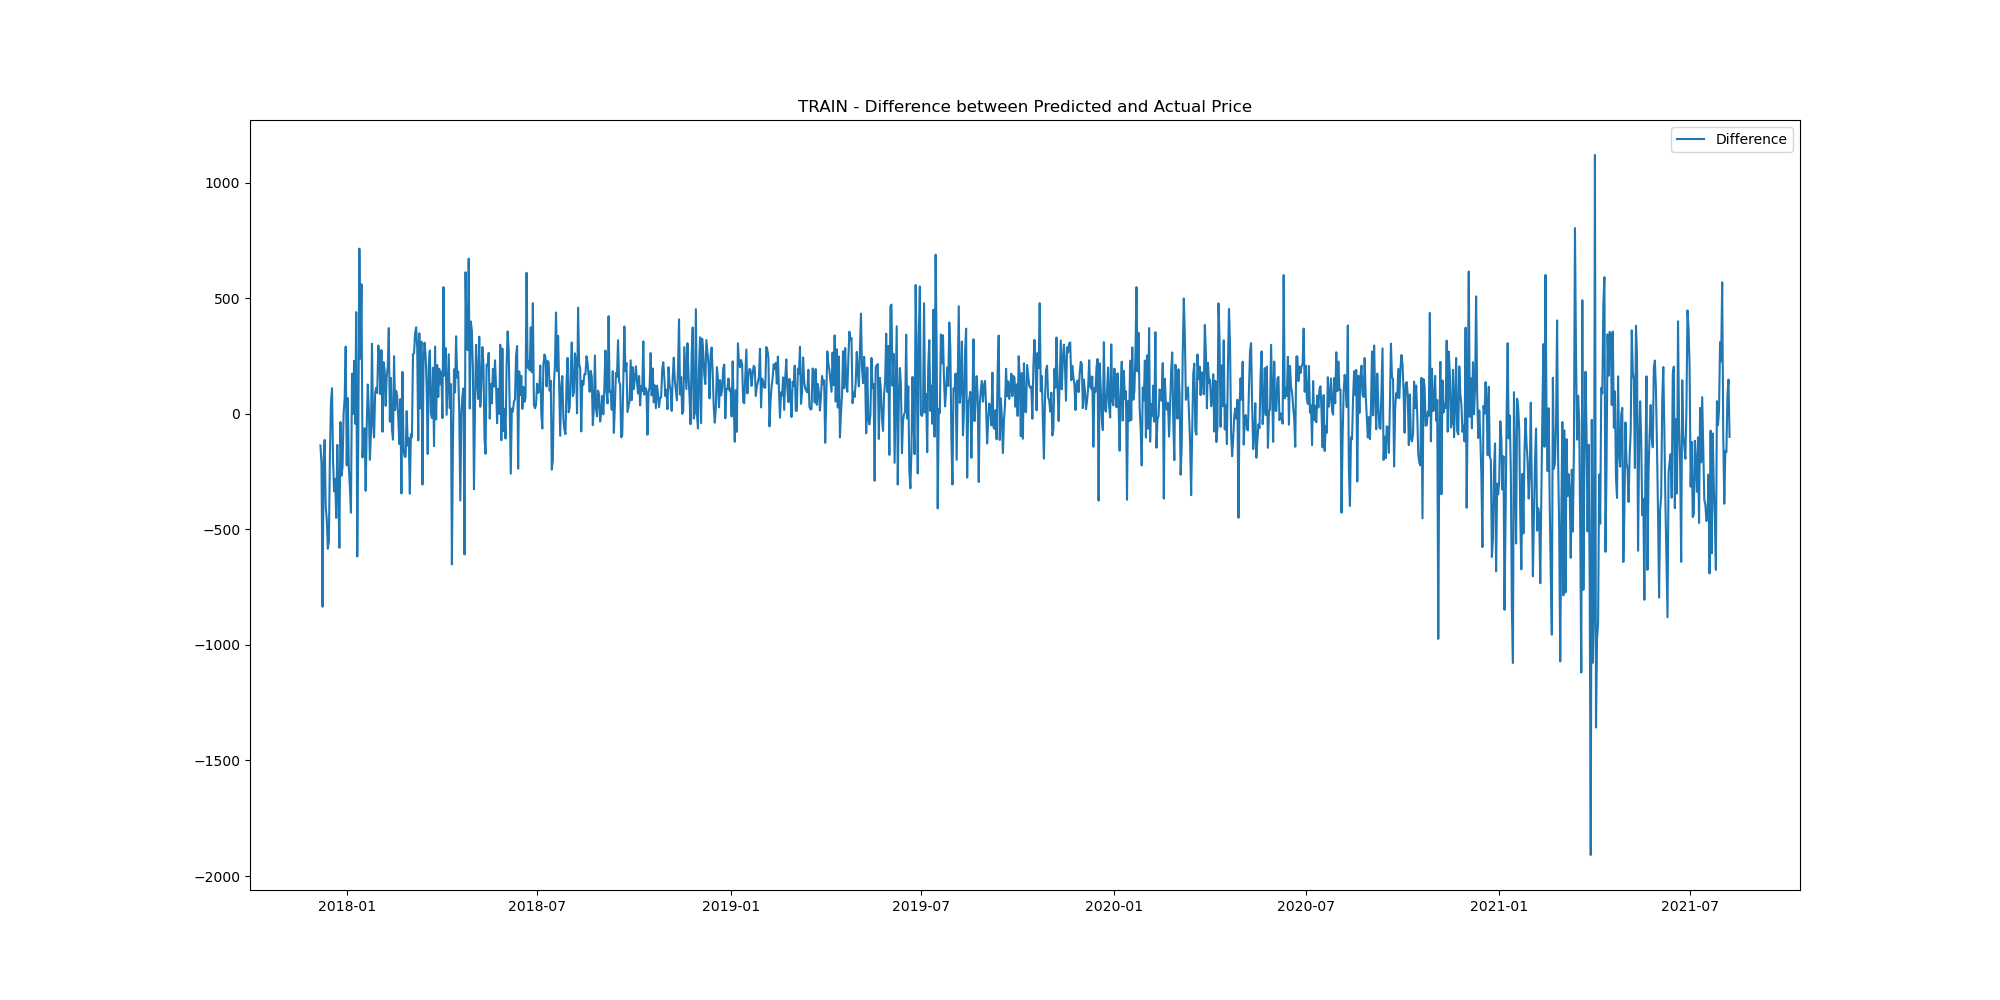

In [13]:
display.Image('./images/difference_between_predicted_and_actual_price_train_1.png')

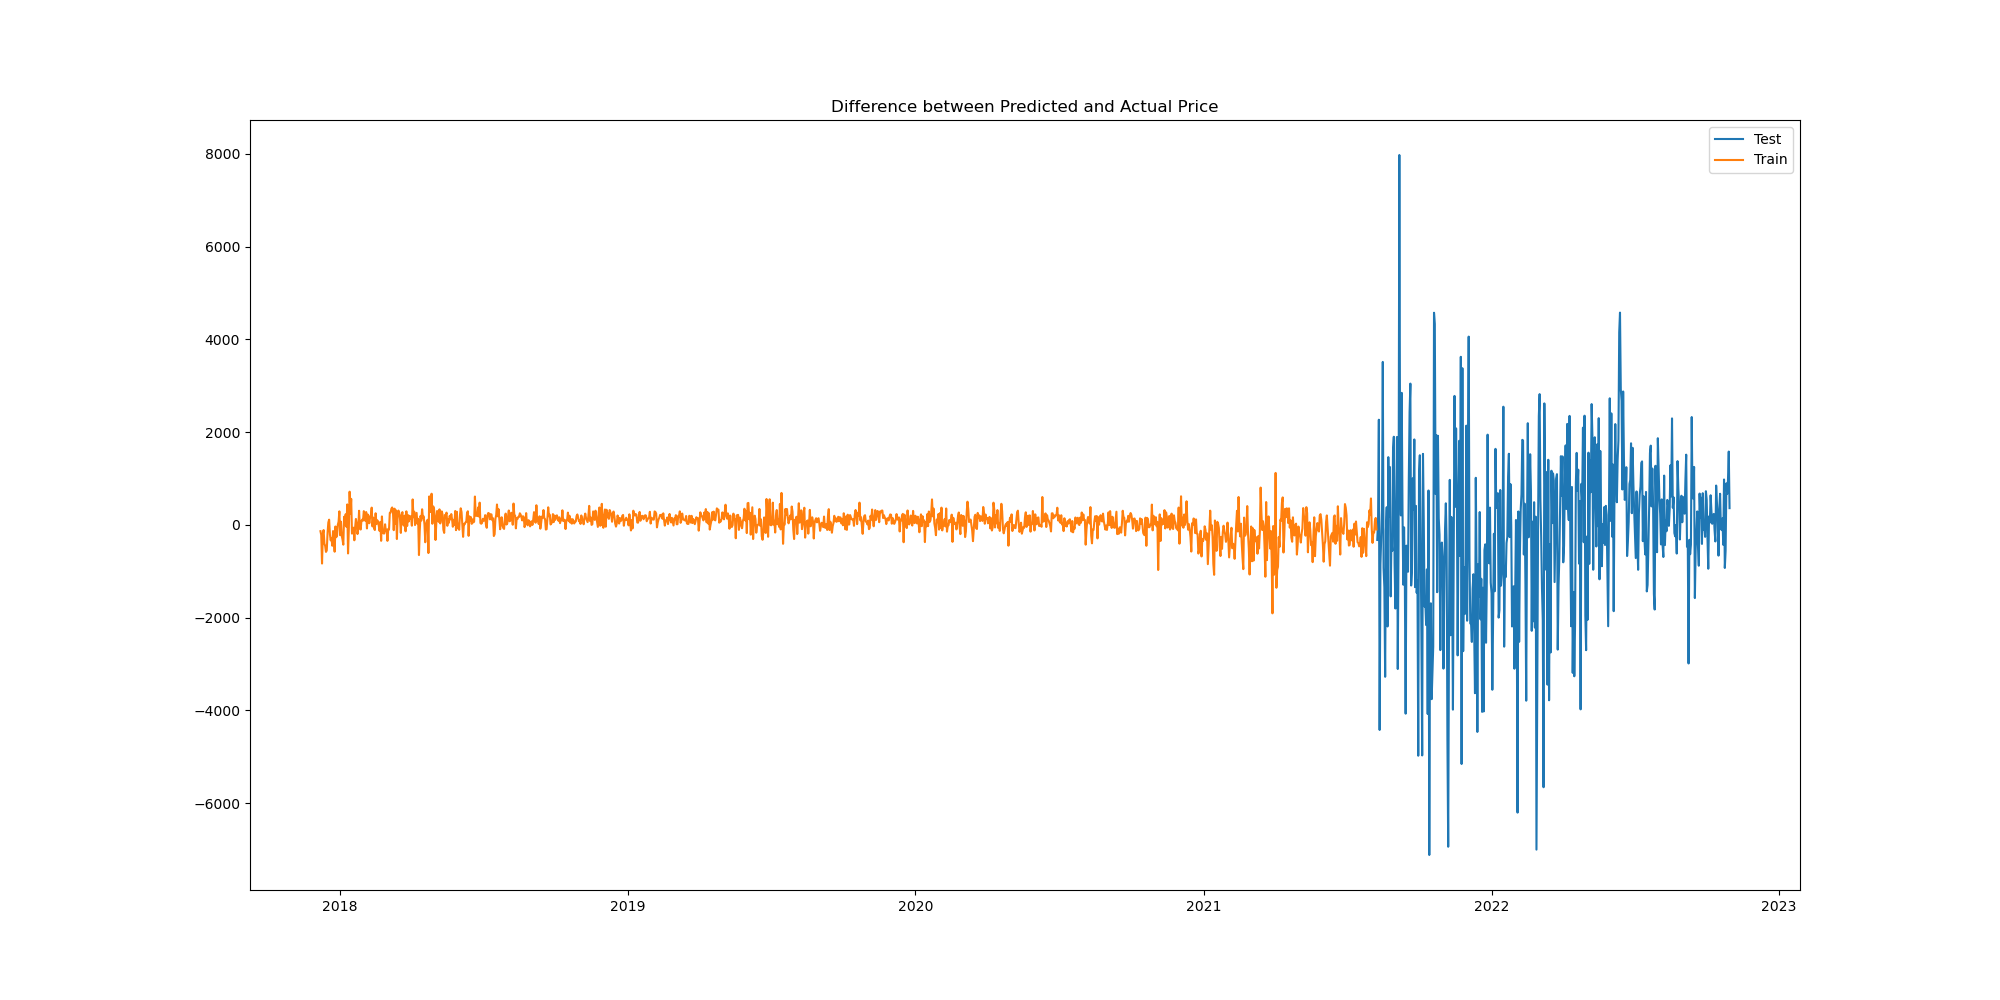

In [14]:
display.Image('./images/difference_between_predicted_and_actual_price_test_vs_train_1.png')

#### These plots shows that we have over fit the model to the training data

Since the variance in the training data is much lower than the variance in the test data we can infer that the model is overfitting the training data. In order to reduce the overfitting, we add dropout layers to the model.

### Model Evaluation with Dropout

Dropout is a regularization technique for reducing overfitting in neural networks by preventing complex co-adaptations on training data. It is a form of regularization, which is adding a small amount of noise to the input values of a layer in order to reduce overfitting. Dropout works by randomly setting a fraction rate of input units to 0 at each update during training time, which helps prevent overfitting.

Below we will attempt to reduce the overfitting by adding a dropout of 0.10 to the model.

The dropout model was evaluated and the mean square error and mean absolute error were obtained.

    TEST MEAN SQUARE ERROR: 0.0013953 (0.14%)

    Test MEAN ABSOLUTE ERROR: 0.0287092 (2.87%)

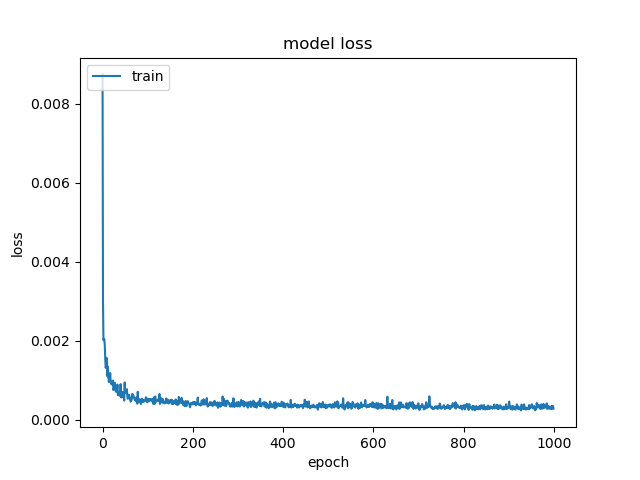

In [15]:
display.Image('./images/model_loss_2.png')

### Dropout Model Predictions

Here we plot the predicted values against the actual values to get a visual representation of the model’s performance for the train and test data.

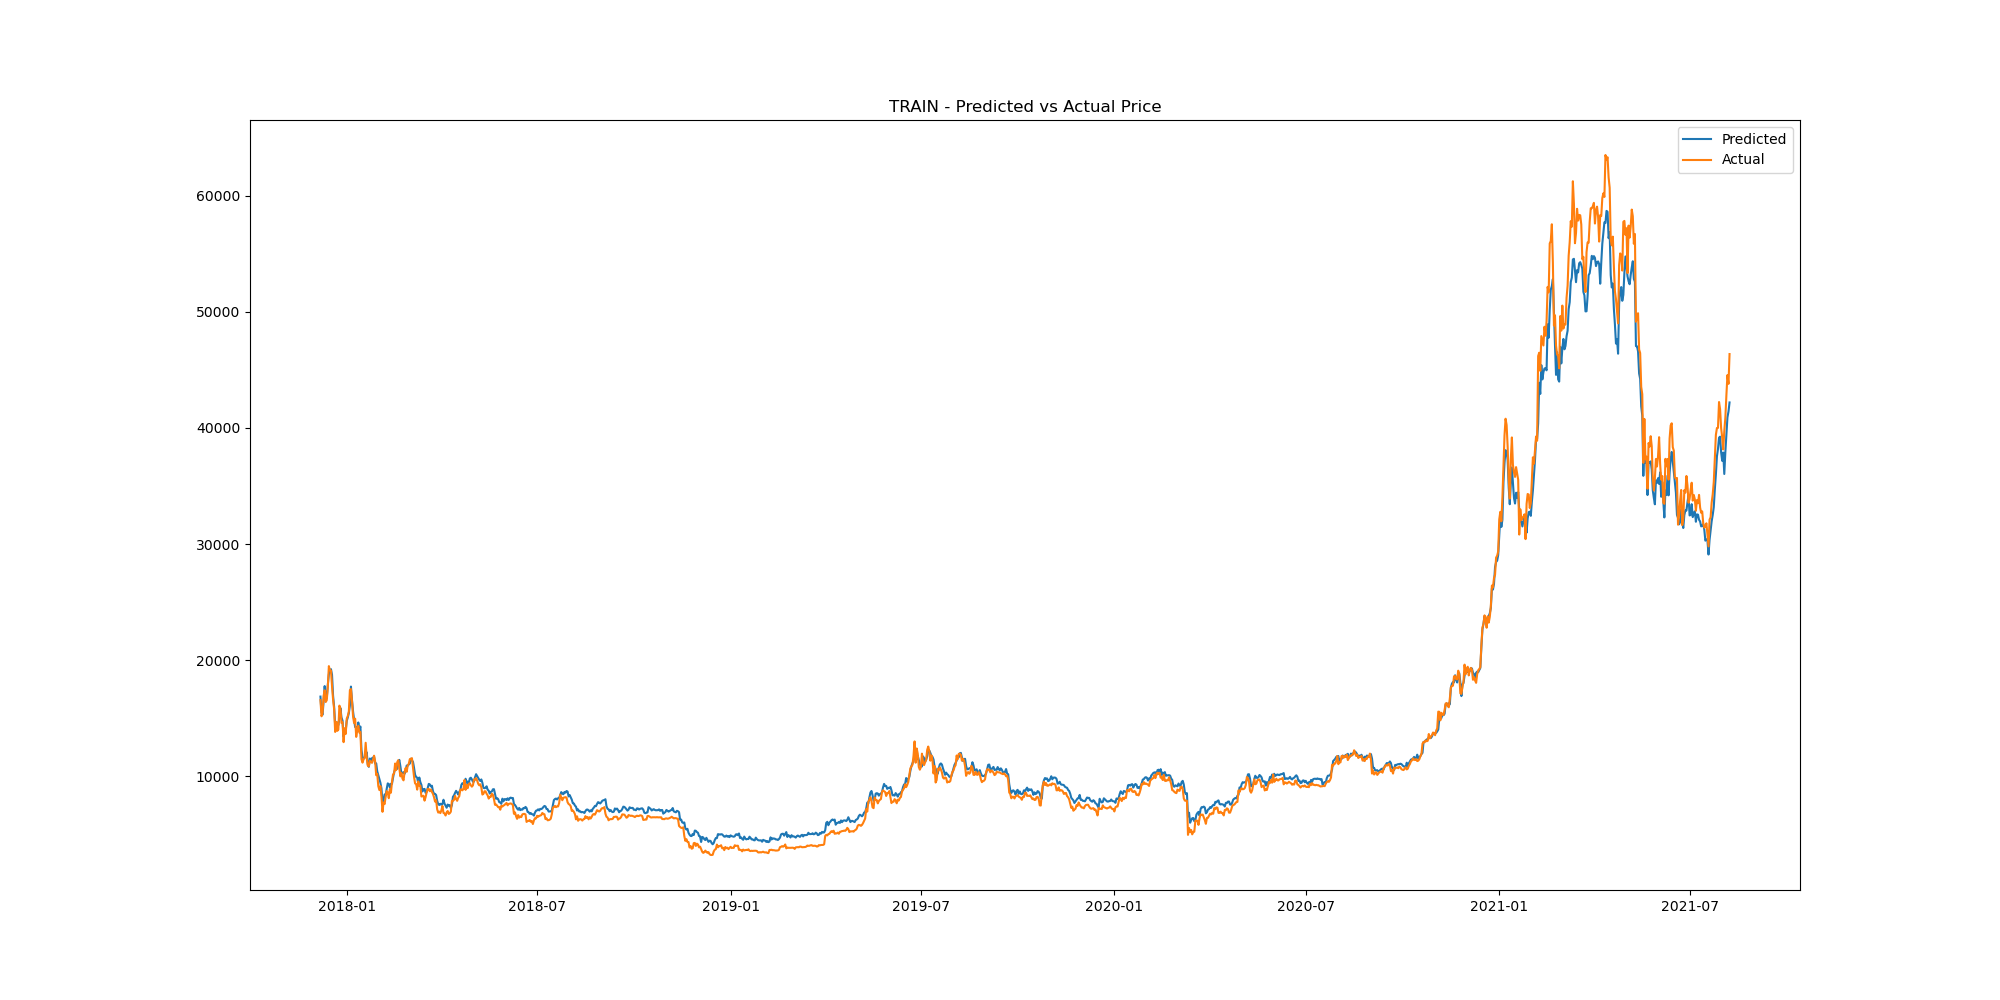

In [16]:
display.Image('./images/predicted_vs_actual_price_train_2.png')

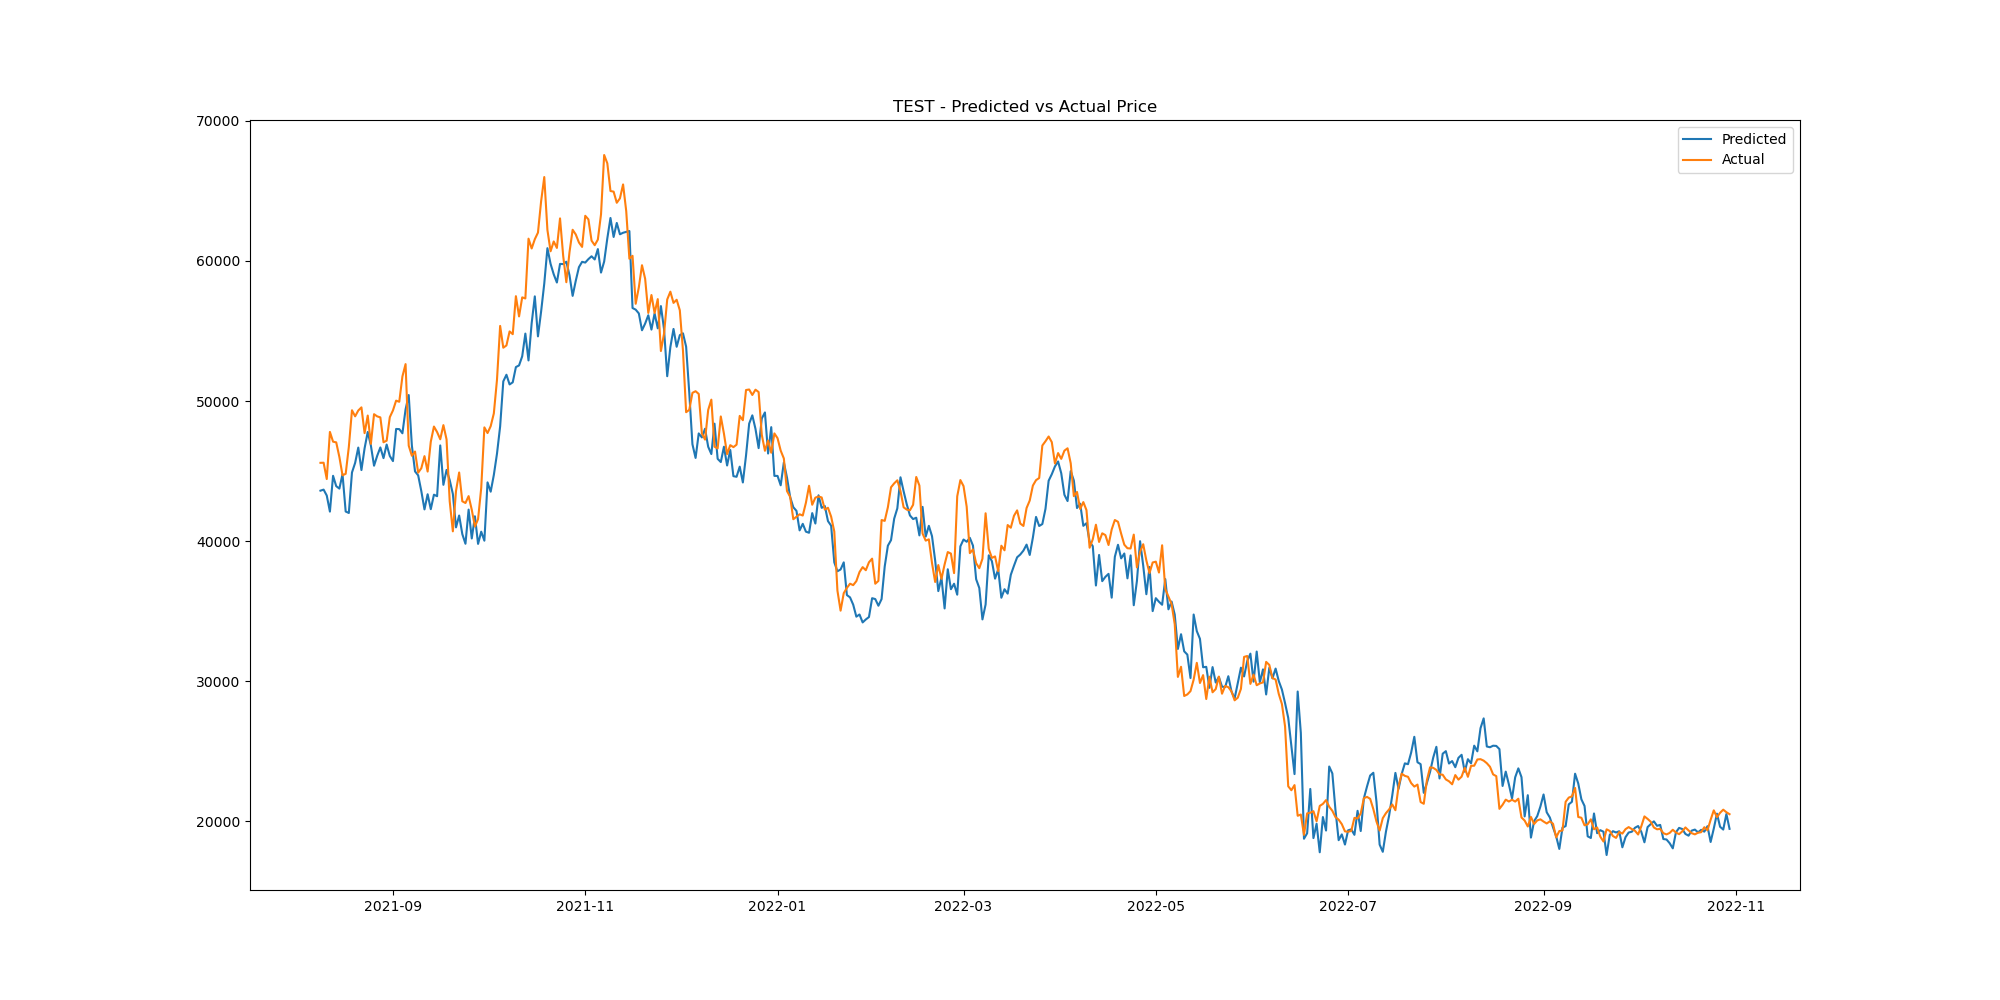

In [17]:
display.Image('./images/predicted_vs_actual_price_test_2.png')

### Dropout Model Prediction (Zoomed In)

Here we can see the dropout model is predicting lower in the test data.

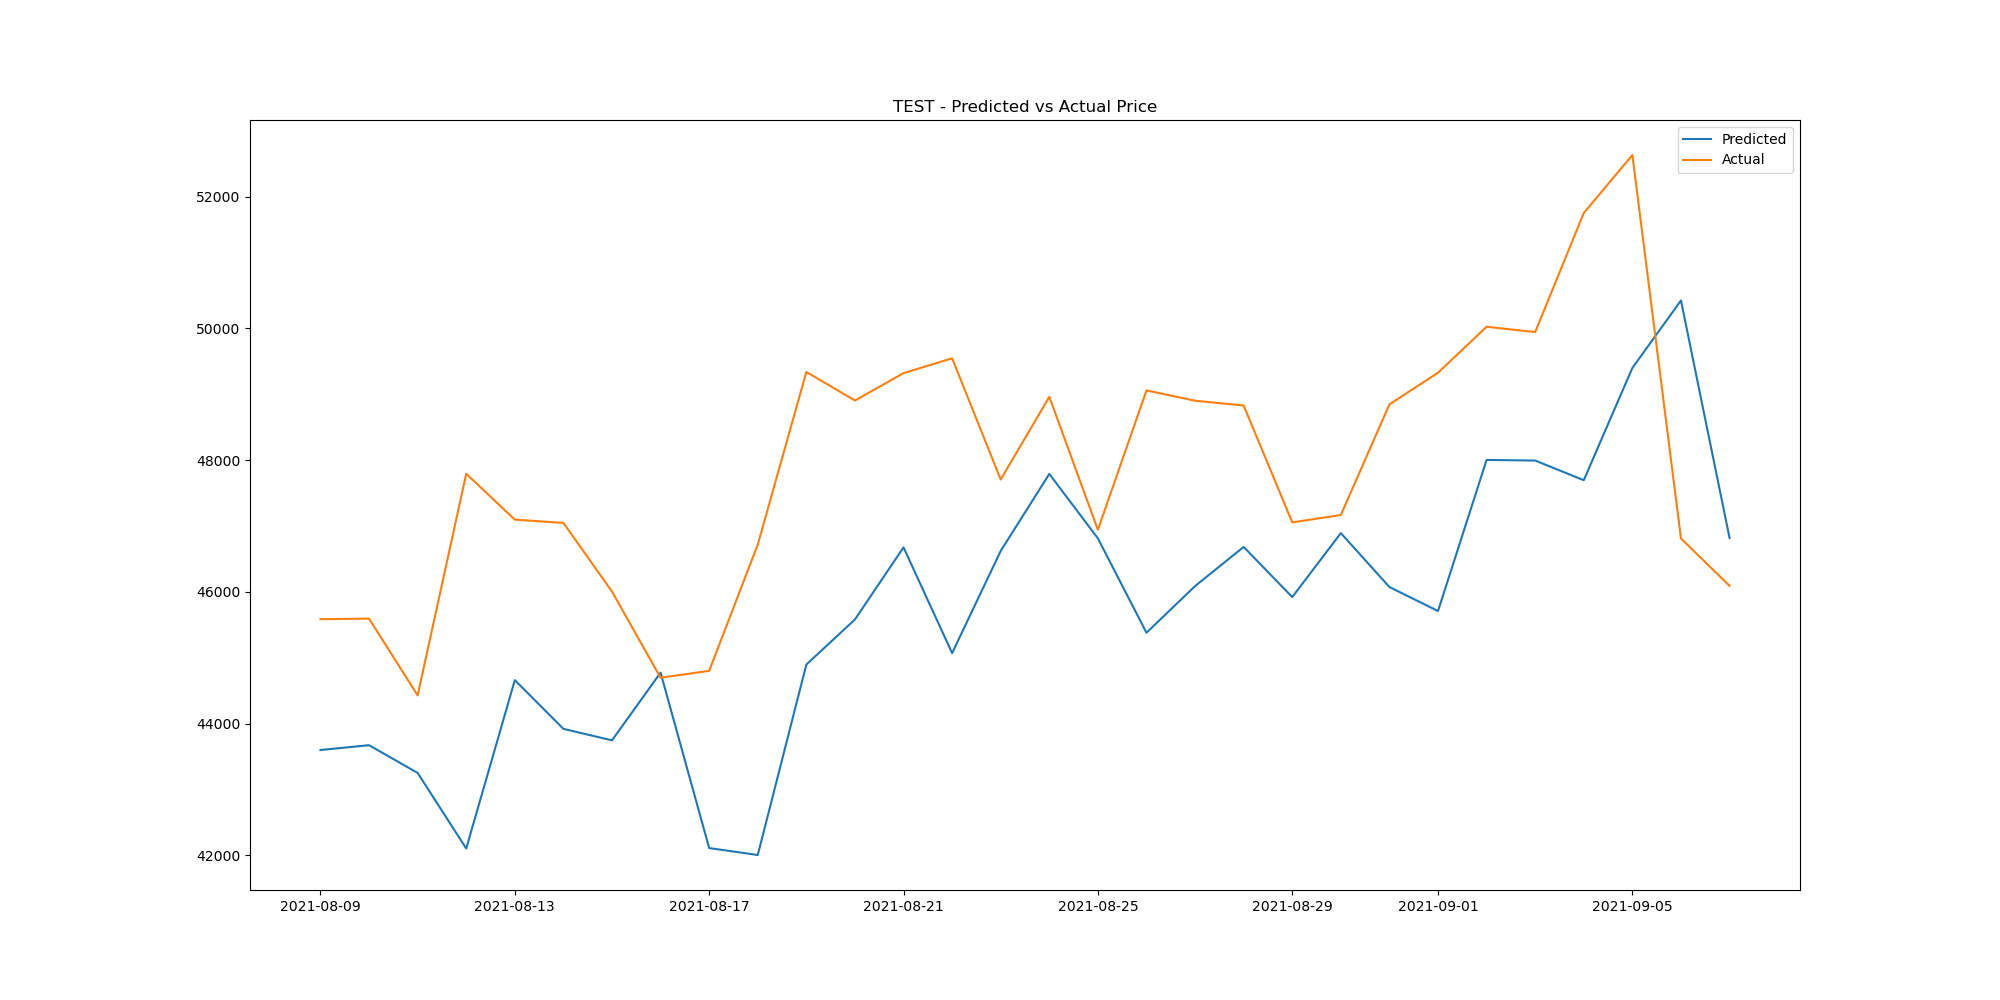

In [18]:
display.Image('./images/predicted_vs_actual_price_test_zoom_2.png')

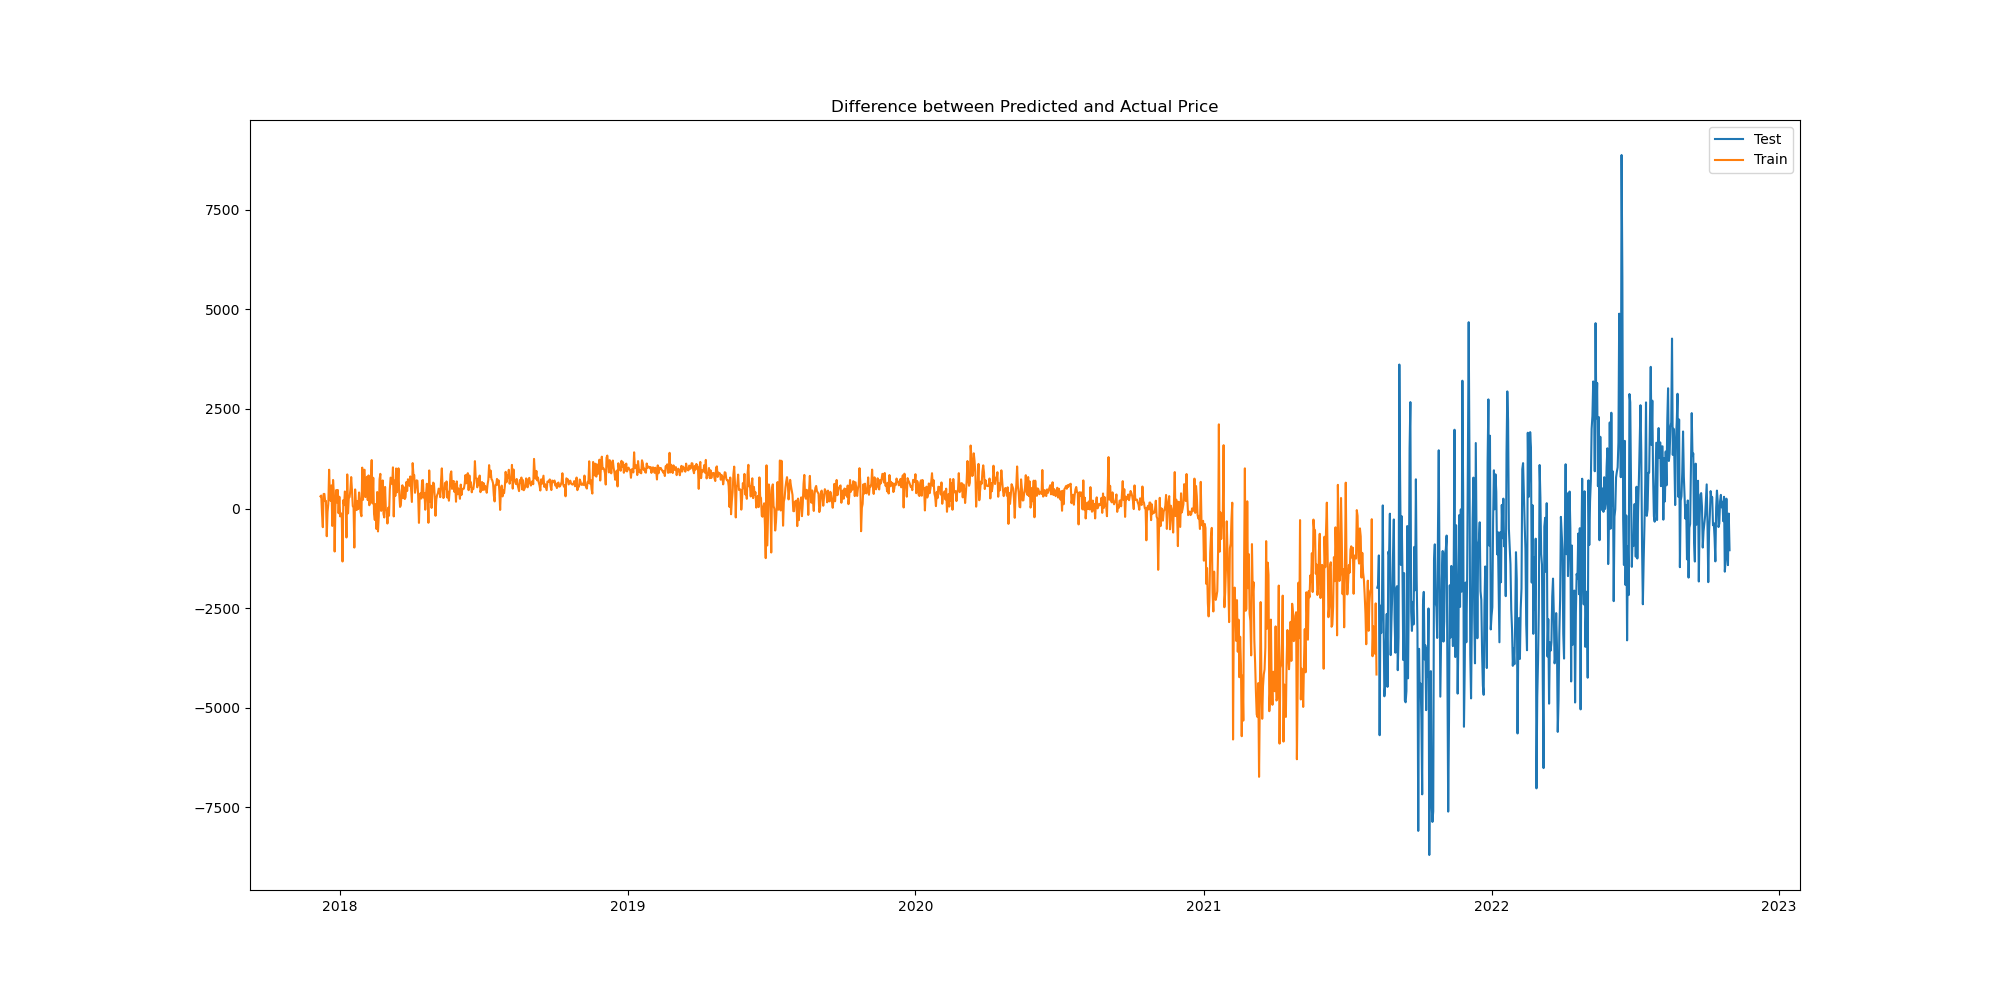

In [19]:
display.Image('./images/difference_between_predicted_and_actual_price_test_vs_train_2.png')

### Comparing the two models

The average absolute difference between predicted and actual values for the test data is:

    $1319 (without dropout)
    $1970 (with dropout)

So it seems that the dropout model is not as accurate as the model without dropout.

### Model 3: Shuffled Data

Here we will attempt to reduce the overfitting by shuffling the data before splitting it into training and test sets. The reason for this is that the data is time-series data and the model is learning the patterns in the data. If we shuffle the data, the model will not be able to learn the patterns in the data and will be forced to learn the features of the data. 

The issue is that we do not know how to unshuffle the data to produce a plot of the predicted values against the actual values.

#### Shuffled model evaluation

The shuffled model was evaluated and the mean square error and mean absolute error were obtained. The results are substantially better than the previous models.

    TEST MEAN SQUARE ERROR: 0.00059 (0.06%)

    Test MEAN ABSOLUTE ERROR: 0.00059081 (0.06%)

### Shuffled Model Predictions

Here we plot the predicted values against the actual values to get a visual representation of the model’s performance for the train and test data.

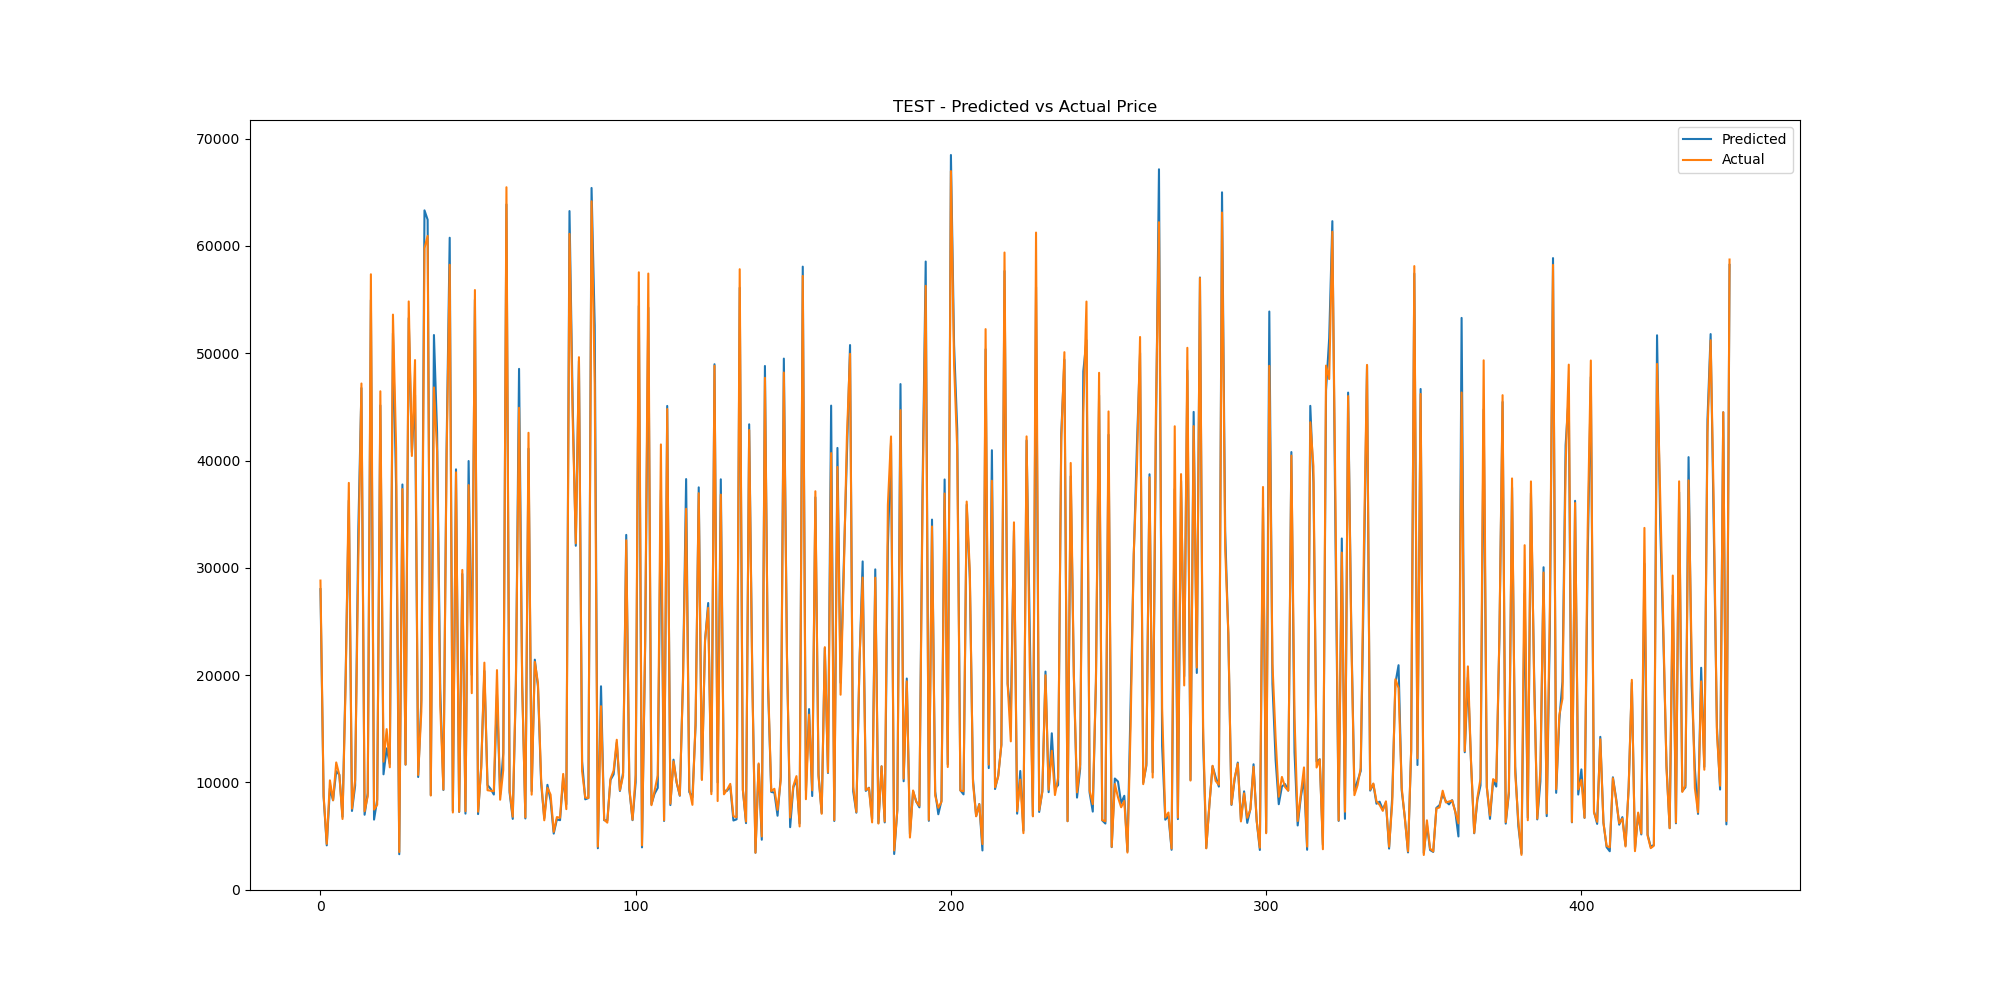

In [20]:
display.Image('./images/predicted_vs_actual_price_test_shuff.png')

### Shuffled Model Prediction (Zoomed In)

Here we see that the model is showing excellent results for the test data.

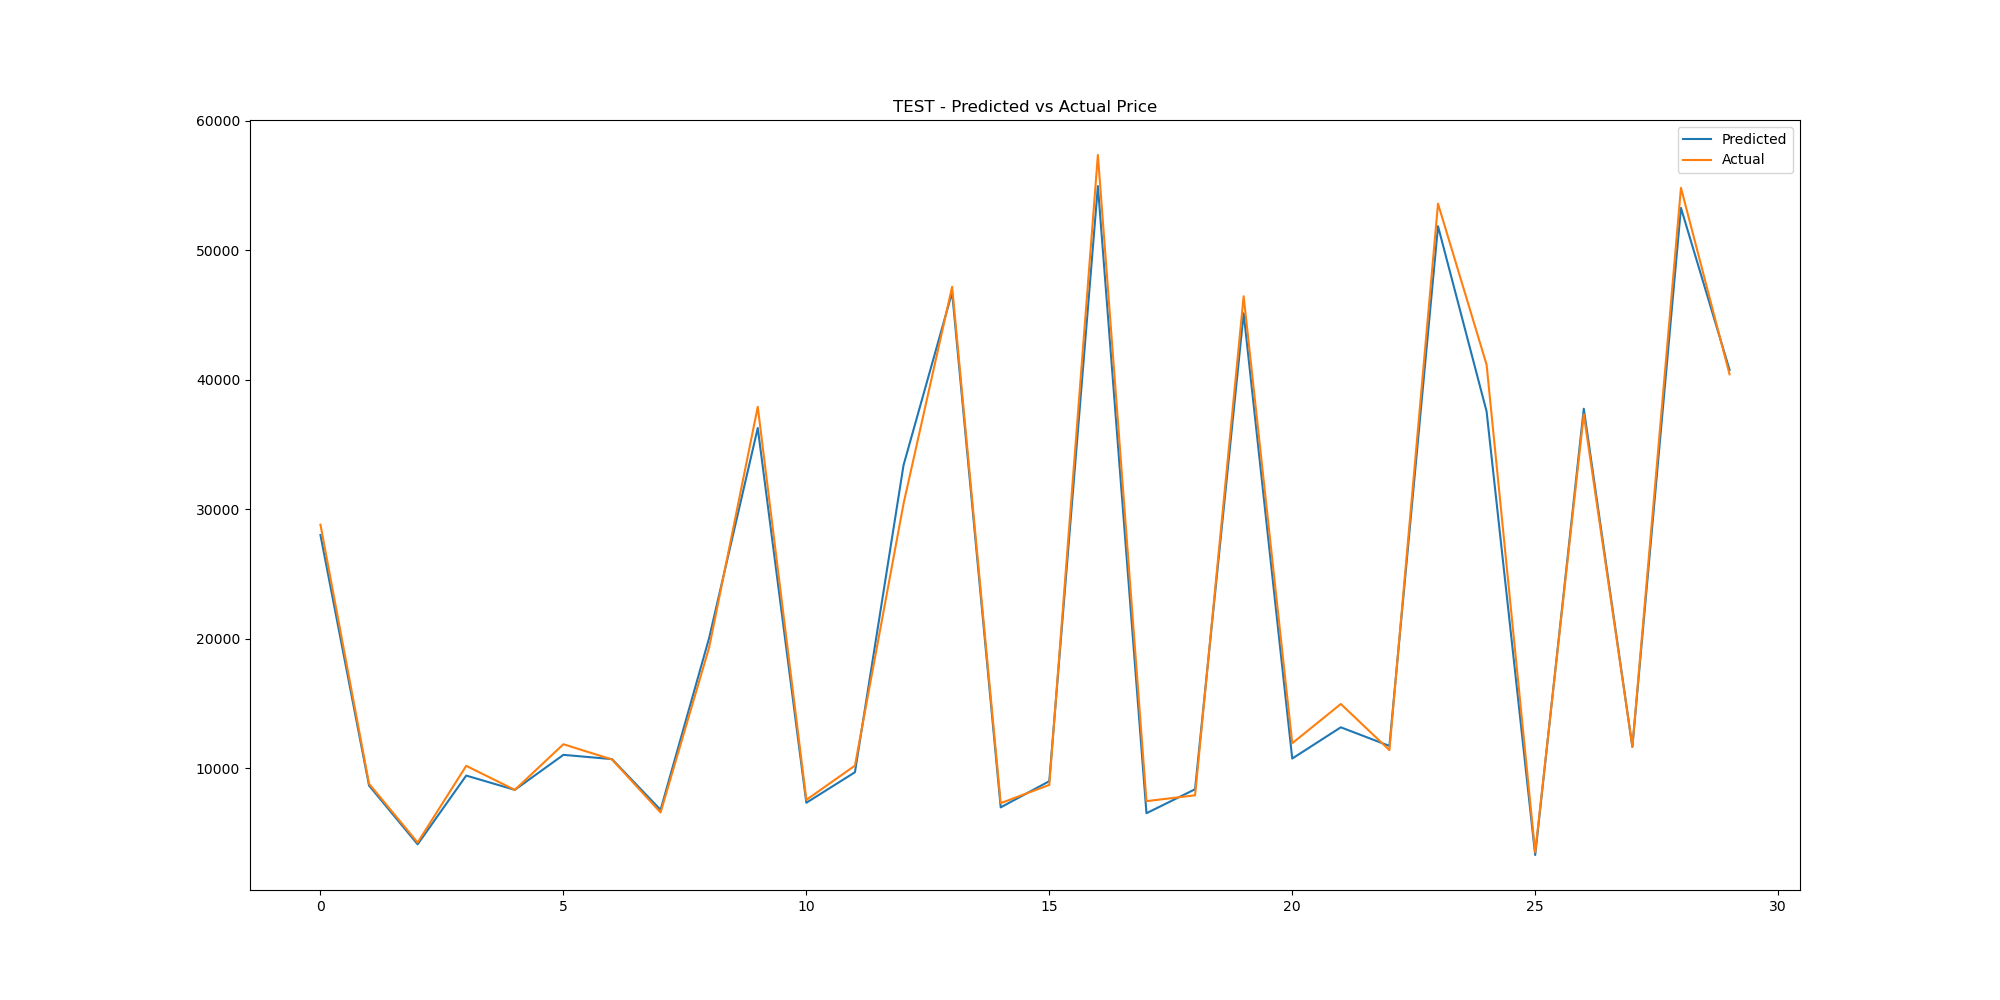

In [21]:
display.Image('./images/predicted_vs_actual_price_test_zoom_shuff.png')

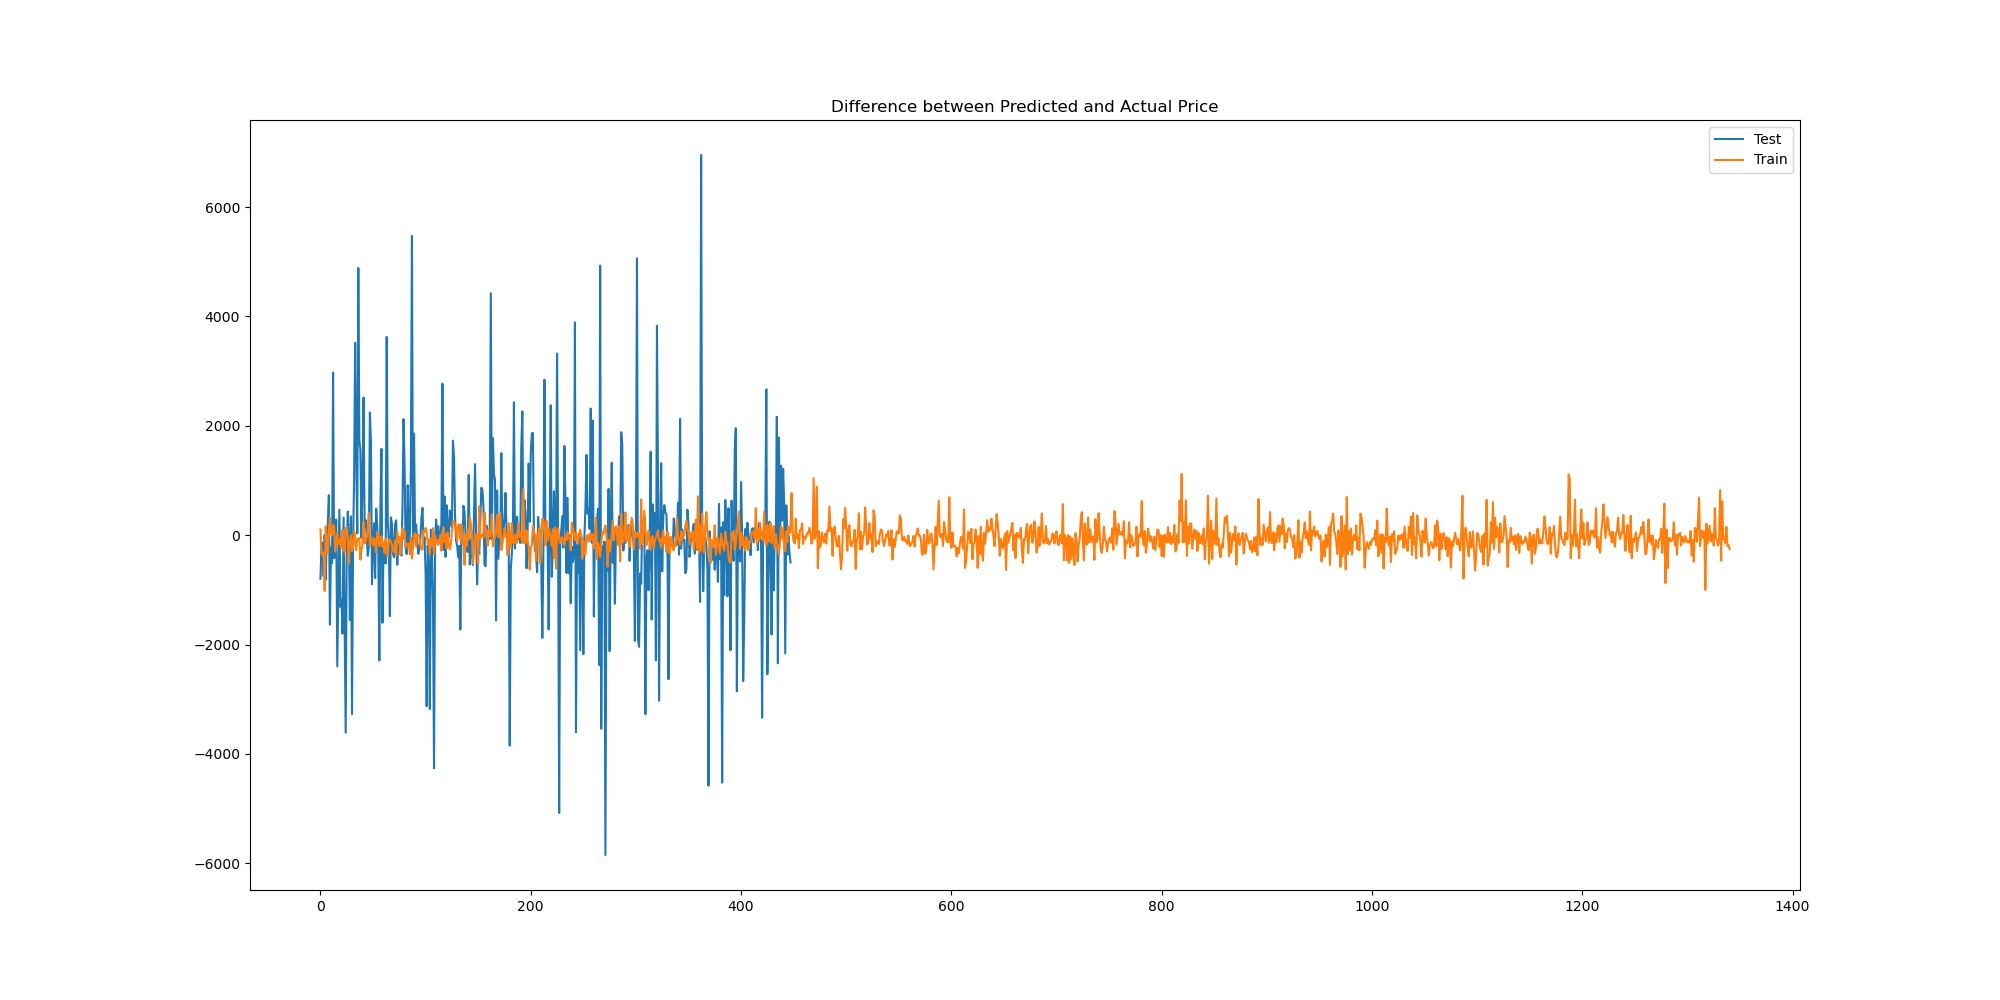

In [22]:
display.Image('./images/difference_between_predicted_and_actual_price_test_vs_train_shuff.png')

### Comparing the three models

The average absolute difference between predicted and actual values for the test data is:

    $1319 (without dropout)
    $1970 (with dropout)
    $1062 (shuffled)

Here we can see that the shuffled model is the most accurate model.

### Discussion

From the tests performed, it has been determined that the prediction model trained on the unshuffled data did not perform as well as intended. By creating a profit calculator that would buy and sell based on the model’s predictions, it was determined that the model was atrociously profitable on the train set and would lose money on the test set. This is symbolic of overfitting. The shuffled data seemed very promising but we were unable to plot the predicted values against the actual values to see how well it performed visually and we were unable to run the shuffled data model through the profic calculator to see how well it would perform in the real world.

The largest issue that was encountered in the experiment was involving standardizing the data input and target values. If I performed the regular standardization using scikit learns MinMaxScaler on the data and then unstandardized with the same scaler, the prices would be drastically different. To address this, I standardized the target to the all time high and all time low of BTC and unstandardized it this way as well.


Throughout the experiment, we were left with quite a few realizations and further questions to investigate in the future.


1) We should have tried to see if we could predict price without price data but only sentiment (if we had it) and the search trends to see if there are some hidden predictive qualities in those features themselves. The network may have found the price data to be so useful that it disregarded the search trend data.

2) Maybe if we trained on hourly data from a recent time period we would have better results since the volatility of BTC has been drastic over the last five years and the previous five years may not hold as much value as we had hoped.

3) Even though we had low error rates, that does not mean our model is working well for our needs. It is more important that it can accurately predict if the price will go up or down. With this said, we could have used a binary classifier rather that simply stated if price would go up or down.

4) We can reduce the overfitting by shuffling the data before splitting it into training and test sets. The reason for this is that the data is time-series data and the model is learning the patterns in the data. If we shuffle the data, the model will not be able to learn the patterns in the data and will be forced to learn the features of the data. Are we limiting ourselves by thinking we need plots to visualize?

5) Since our data is time-series based, we should consider using an LSTM model instead of a simple feed forward model. This would allow the model to learn the patterns in the data and would allow us to use the data in its original form.

6) Since we want to eventually make a trading bot, using a reinforcement learning methodology to train the model would be a good idea. This would allow the model to learn how trade on its own and could end up being quite profitable.

## Kassidy Barram's Experiments

### Experiments to Compare the Performance of the Keras Sequential Neural Network and Manually Implemented Neural Network 

A series of experiments were conducted in order to compare the Keras Sequential Model to the manually created A4 Solution Neural Network for CS545. The steps used to perform the comparison were to closely follow the sequence of execution used by the original experiments conducted using Keras. The motivation behind this was to determine if there are benefits in using the pre-built packages over the manually implemented A4 solution.

The initial step was to read in and format the complete data in the same way as with the Keras experiments. This involved reading in the csv into a pandas dataframe and indexing the pandas dataframe on the date column. The next step was to remove any rows in the dataset that contain NaN values. This removal of NaN values decreased the total number of rows from 1791 to 1790. 

Next, the minimum and maximum values of Bitcoin needed to be collected. These values were gathered by using the Yahoo Finance API. The purpose of gathering these values was to scale the data in the same way as the original experiments. From here, the addition of the slopes and previous day’s values were added to the dataframe; the data was split into target and input (X, T), and the input data and the target values were scaled in the same way as the original Keras experiments. 

The A4 model parameters used to match the original experiments were:
* 1000 epochs, the optimizer used was Adam
* The structure used was 3 hidden layers with 64 neurons per layer
* The learning rate was 0.001
* The error function used was the mean squared error function. 

The Keras model used additional parameters not used in the A4 Neural Network implementation, so a perfect replication of parameters is infeasible. These additional parameters were dropout, batch size, and instance. These values were set to 1 for instance, false for dropout, and 30 for batch size. 

Once training was concluded, the differences between the outputs from the 2 models became apparent. For instance, the lowest MSE value the original Keras model obtained was 0.00003, and the lowest MSE value the A4 model achieved was 0.01775. This result shows that the Keras model was able to predict values for the training data more accurately than the A4 model.

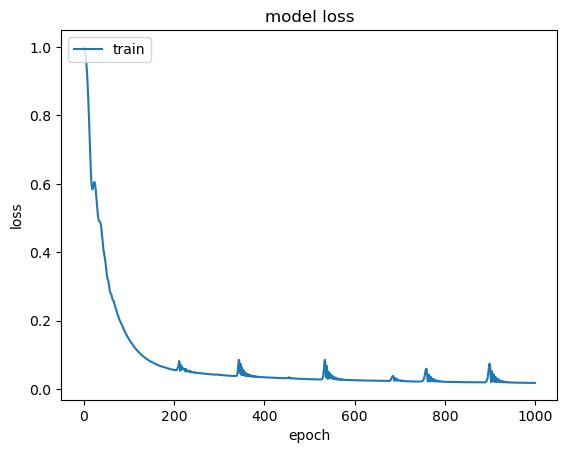

In [27]:
display.Image('./images/Model_Loss_A4.png')

In addition to the final MSE values the models achieved, the way the model loss values decreased during training is starkly different. Displayed above shows the model loss of the A4 model over 1000 epochs. The starting value of the error began at approximately 1 and then sharply decreased to a loss value of around .03. During the rest of training, the loss of the A4 model steadily decreased except for occasional jumps in the value. When comparing this graph to the graph of the loss function for the original Keras model (displayed below), the Keras loss graph also illustrates jumps in the loss value, but these jumps occur much more regularly to the extent that there are no smooth intervals shown in the graph. The Keras graph also indicates a very sharp decrease in the loss function at the beginning of training in the same way as the A4 loss graph demonstrates, but in this case the decrease is immediate with no gradation. 

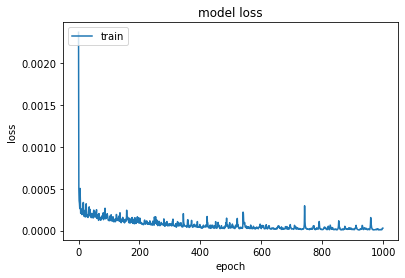

In [28]:
display.Image('./images/Model_Loss_Keras.png')

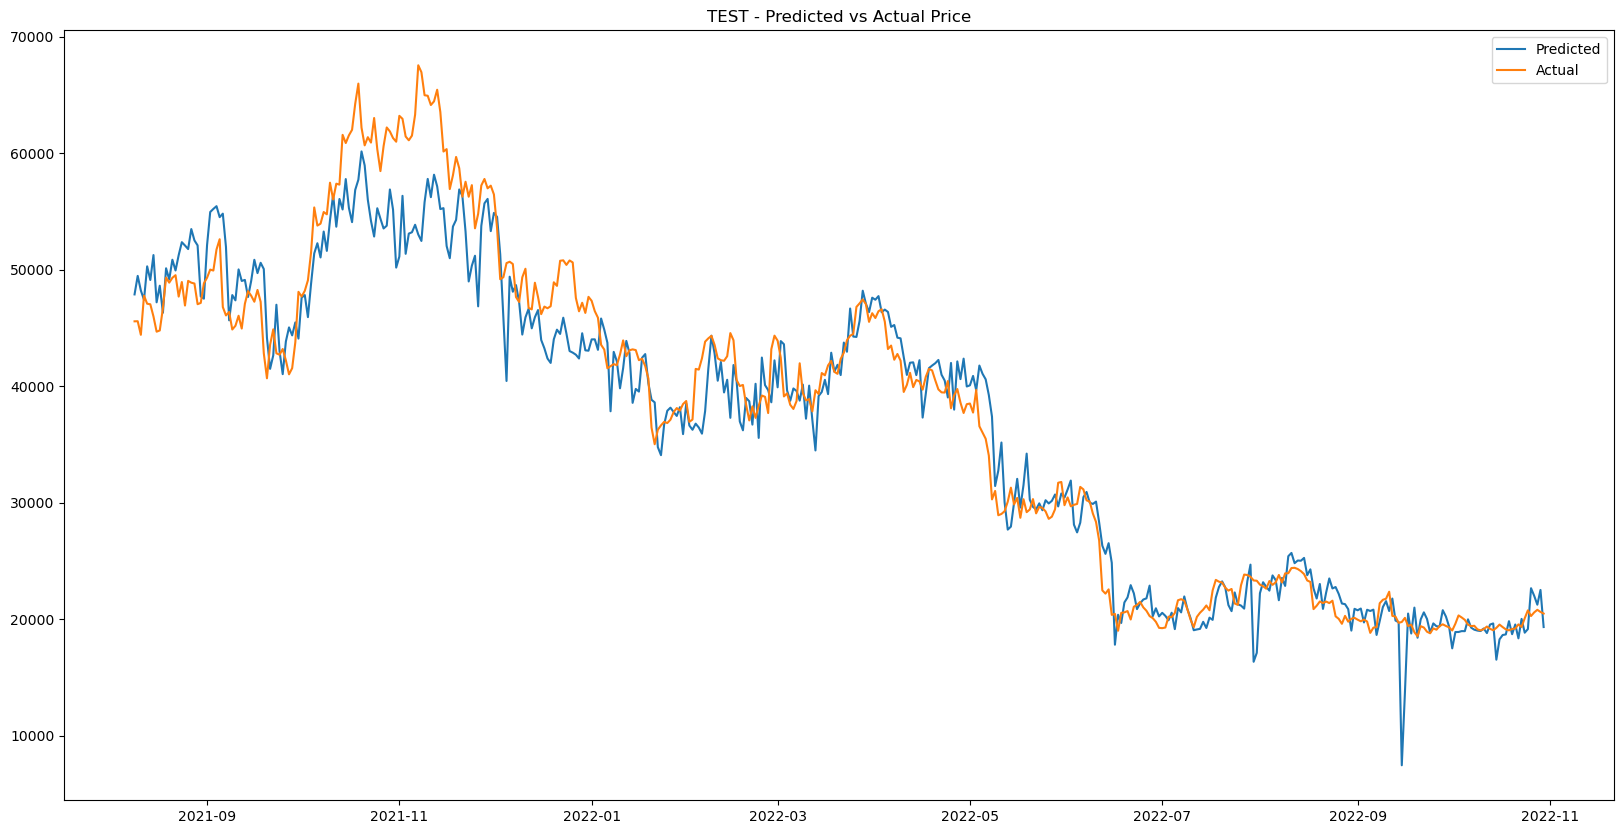

In [29]:
display.Image('./images/Test_Predictions_A4.png')

The next comparisons are to determine if there are differences in the predictions made by the two models. Shown in the graph above is an illustration of the A4 model’s predictions for the testing set plotted alongside the actual price of bitcoin at a given time. The general trends in the price for bitcoin are being effectively predicted by the model, but the model is often making predictions for a change in price significantly after the actual price changes. This potentially indicates that the model is largely using the input feature of the previous day’s bitcoin price to perform its predictions. 

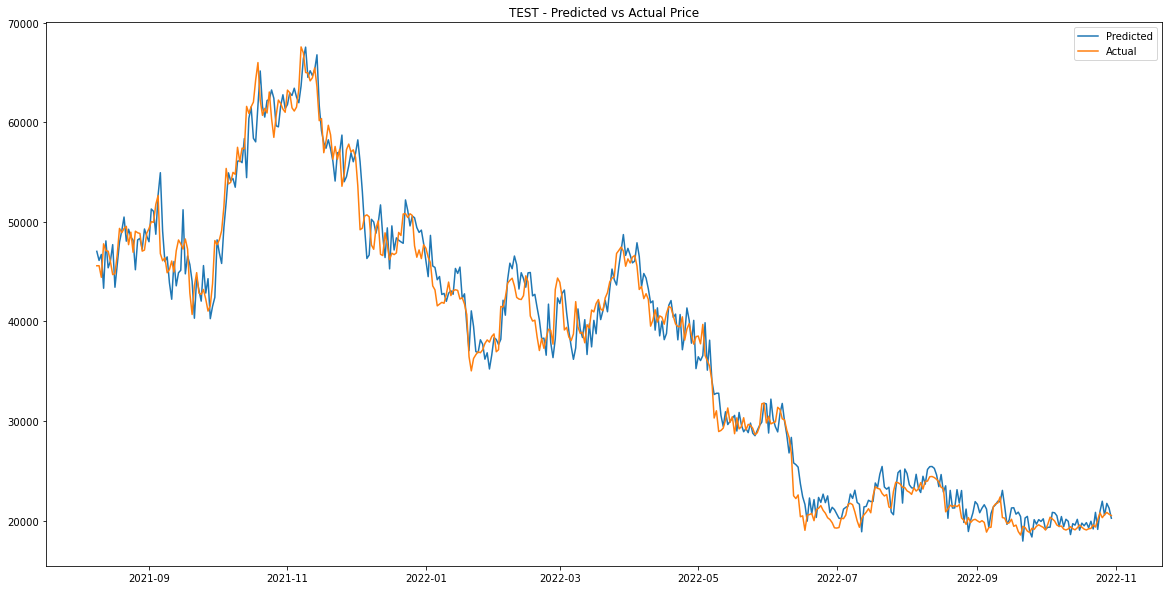

In [30]:
display.Image('./images/Test_Predictions_Keras.png')

Depicted in the above graph, is the original Keras model's predictions for the testing data. The Keras model was much more effective at making predictions compared to the A4 model. This is visible in the way the predicted price adheres to the trends of the actual price much more closely than the A4 model. However, it still appears that the Keras model also follows the changes in actual price in much the same way as the A4 model does, but just to a lesser degree. 

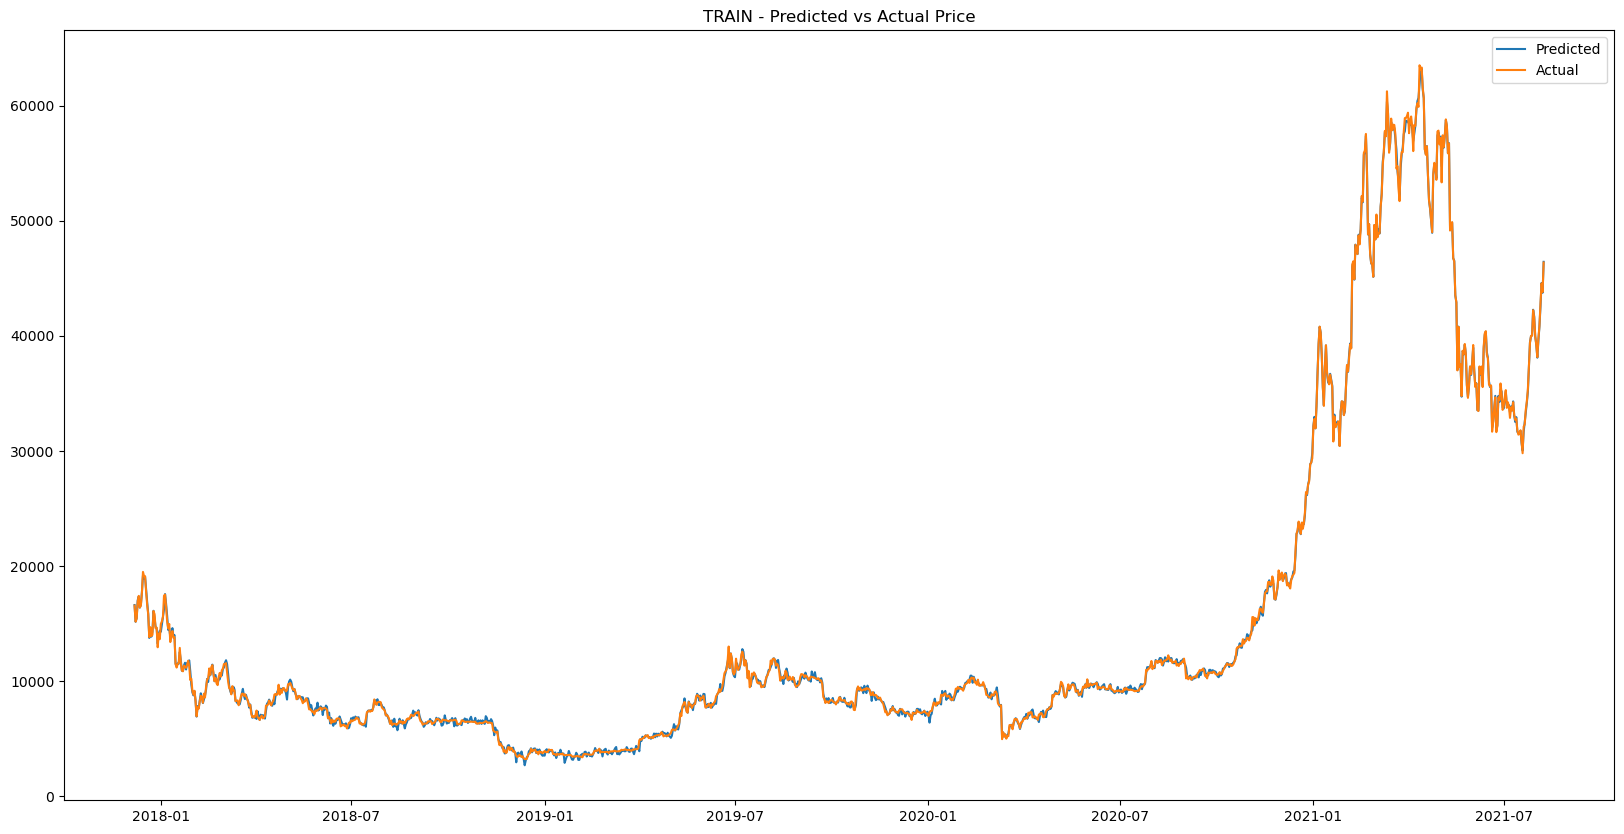

In [31]:
display.Image('./images/Train_Predictions_A4.png')

The graph above depicts the predictions made by the A4 model when the training dataset was used. Compared to the Keras model, the A4 model also appears to have overfit the data much more. This is due to the fact that the predicted price of bitcoin for the training set almost perfectly matches the actual price. In comparison, the Keras model was also overfit, which is visible in the graph below, but to a lesser extent. 

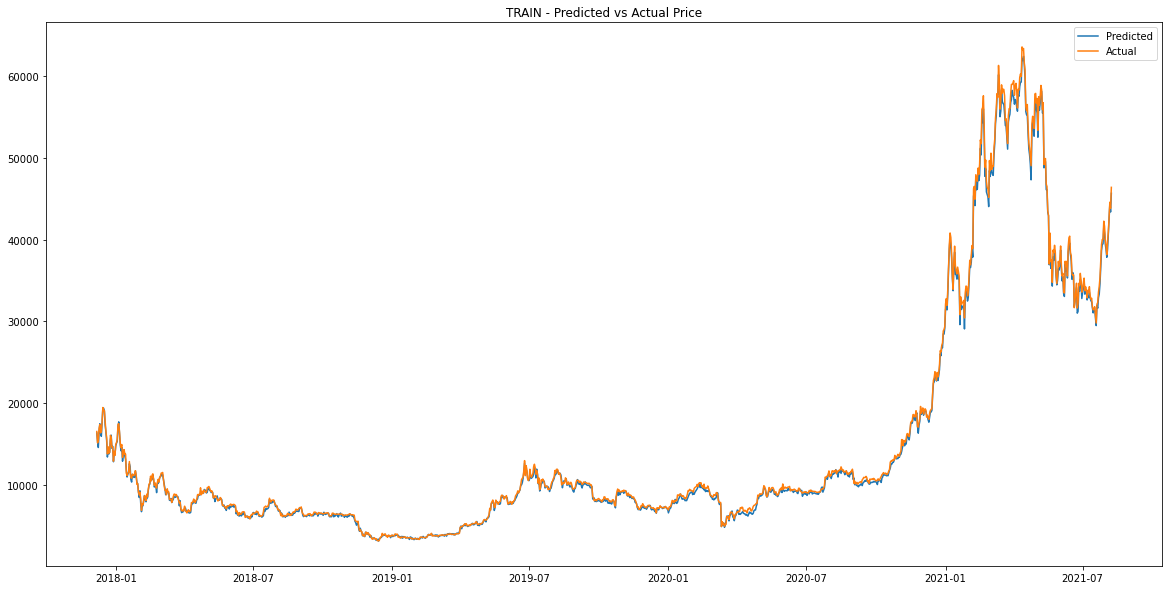

In [32]:
display.Image('./images/Train_Predictions_Keras.png')

Below is a graph showing the differences between the predicted and actual price for both the training set and the test set for the A4 model. The difference for the training set is depicted in orange, and the difference for the testing set is shown in blue. This graph further illustrates the overfitting of the model. This is because the difference in the prediction for the training set is minimal compared to the difference in the predictions for the testing set. 

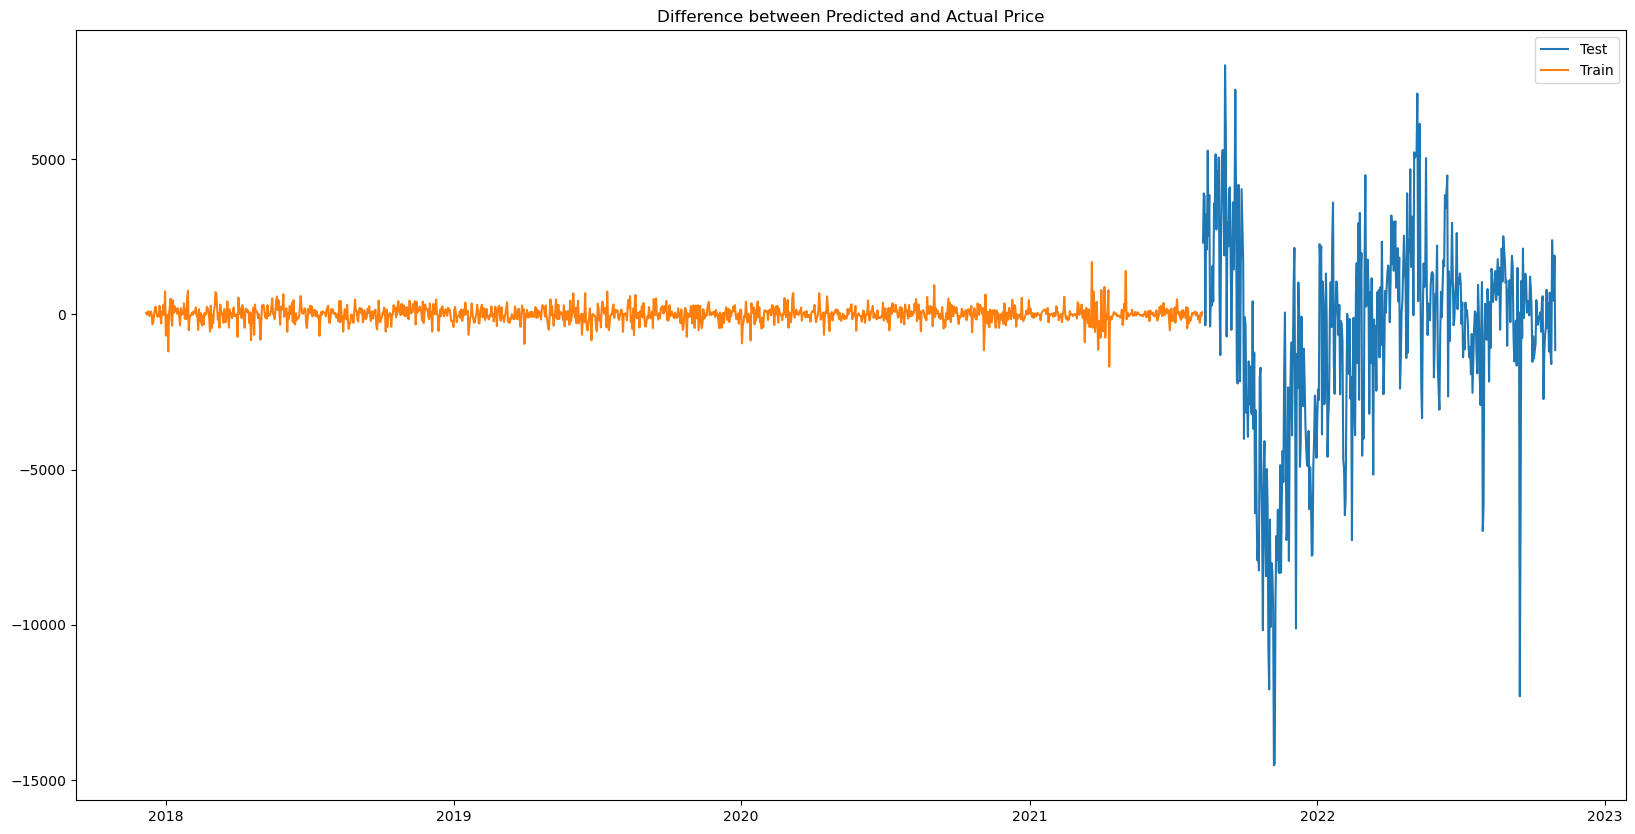

In [33]:
display.Image('./images/Differences_A4.png')

#### Data Shuffling

The next experiment was an attempt to reduce overfitting by shuffling the data. The data was shuffled by leveraging the train_test_split method defined in the sklearn package. The model was trained using the same parameters as the previous experiments. 

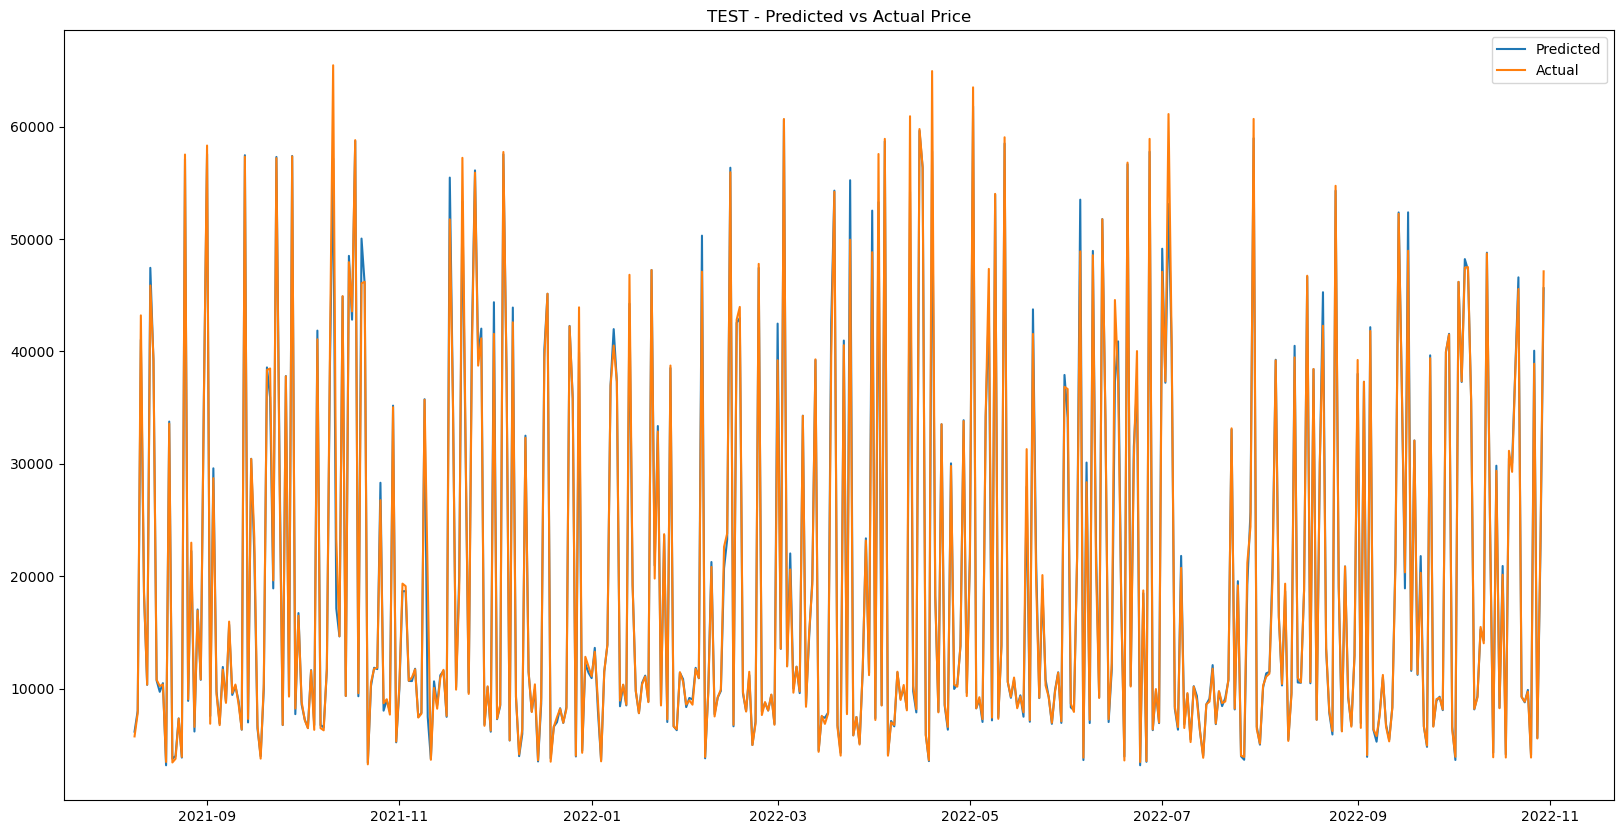

In [34]:
display.Image('./images/Test_Pedictions_A4_Shuff.png')

The graph above shows the predictions made by the A4 model for the shuffled test set. These predictions were made after the A4 model was trained for 1000 epochs on the shuffled training set. 

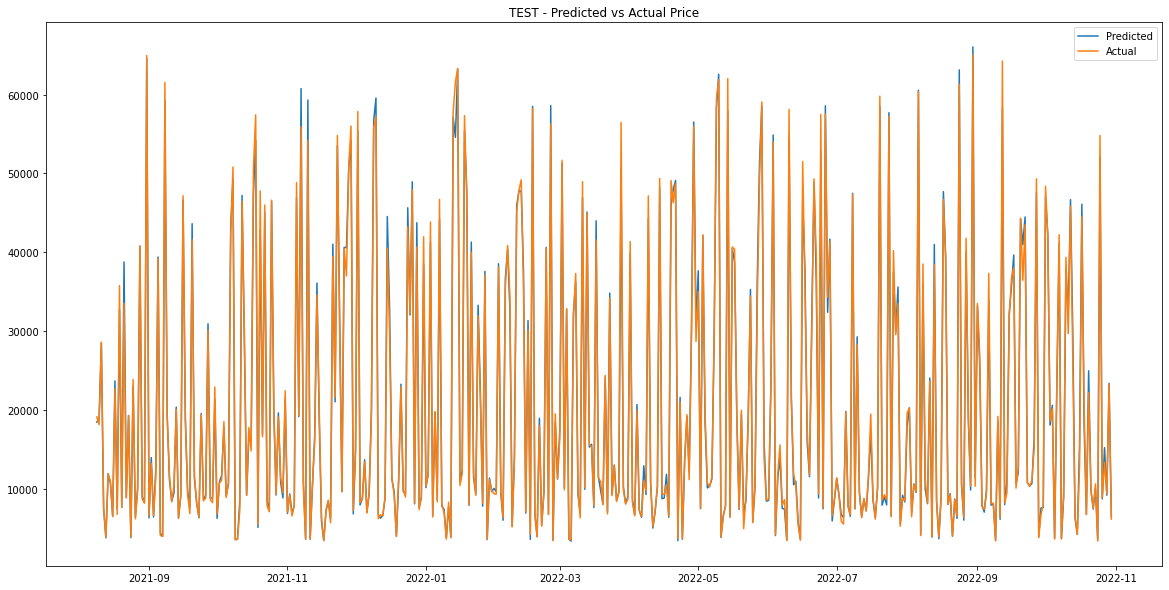

In [35]:
display.Image('./images/Test_Predicted_Keras_Shuff.png')

The graph above is the Keras predictions.

When observing the graphs above of the 2 model predictions for the shuffled test dataset, the models appear to be performing predictions similarly.  However, the standardized MSE value for the A4 model is 0.03948 and the MSE value for the Keras model is 0.00001. These MSE values indicate that the Keras model performed several magnitudes better than the A4 model after the data was shuffled. The A4 model which was trained using the shuffled data also had a higher MSE value than the first A4 model’s MSE value of 0.01808, so the attempt to improve model performance by shuffling the data to try to reduce overfitting didn’t work. 

The results from the comparisons above show that the Keras models overall had lower overfitting and lower MSE values when compared to the A4 implementation. Therefore, it can be concluded that, for this dataset, there is benefit in using the pre-built implementation rather than using a manually implemented Neural Network. 

## Matt Young's Experiments

### Motivation

The purpose of these experiments was to determine the best optimizer for training a neural network and to slim down the input space in hopes of achieving better prediction accuracy. 

From keras’ list of available optimizers I chose to experiment with `adam, sgd, rmsprop, adagrad, adadelta, adama, and nadam`. This list was chosen as it represents many of the most common optimizers available in keras, and includes many that I have had no experience with in the past.

The inputs used to train the networks follow: `'Bitcoin', 'Crypto', 'Cryptocurrency', 'ETH', 'Crypto Ban',  'Crypto Bubble', 'Crypto Market', 'Stocks', 'Time to buy', 'blockchain',  'Open', 'High', 'Low', 'Close', 'Volume', 'PriceDelta', 'VolumeDelta',  'EMA3', 'EMA7', 'EMA14', 'Volume_USDT', 'VolumeDelta_USDT', 'Volatility_USDT', 'Yesterday_Price', '3day_Past_Mean_Price', 'Yesterday_Volume', '3day_Past_Mean_Volume', 'Yesterday_Vol_USDT', '3day_Past_Mean_Vol_USDT', 'RSI', 'RSI_BuySellFlag', 'EMA_BuySellFlag'`.

The tarted for these experiments was `'Target_1Day'`, which represents the value *actual* price of BTC (BitCoin) on the following day.

### Setup

In keeping with experiments performed by my teammates, I chose a network structure containing 3 hidden layers with 64 nodes each, 1,000 epochs, batch size of 30, and MSE as the loss function. I thought it was important to maintain as many of the parameters as possible as I was treating them like `independent variables` in an experiment, with `optimizer and input as dependent variables`. I relied on the exact same helper methods as the experiments that I will compare my output to. These methods include normalization, denormalization, data structure conversion, train/test splitting, model creation, model updating, result output, and result graphing.

### Methodology

In order to test the various optimizers listed above I iterated over the list of optimizers and trained a new model with each iteration, using the current optimizer. I then stored the `mse, mae, loss, and optimizer` name in a dictionary which was converted to a pandas dataframe. The dataframe was `sorted by mae`, putting the lowest mae at the top. I then extracted the optimizer used to train the `best performing model` and trained a new model with that optimizer. This is the model I used to generate the visualizations in the results section.

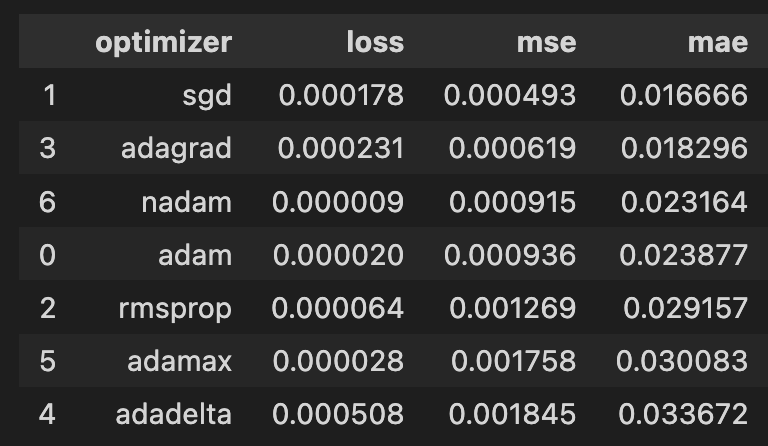

In [38]:
display.Image('./images/all_optimizer_output.png')

We can see that `sgd` outperforms the other optimizers. `adagrad` is pretty close, and the rest of the optimizers are significantly higher. I am using `mae` as the measure how well the model fits the data because I feel that the average distance between prediction and reality is the best metric for this purpose.

We can see that though we did not explicitly sort this dataframe by `mse` it is actually sorted by `mse` because the `mse` values follow the same pattern as the `mae` values. This is not true for `loss`.

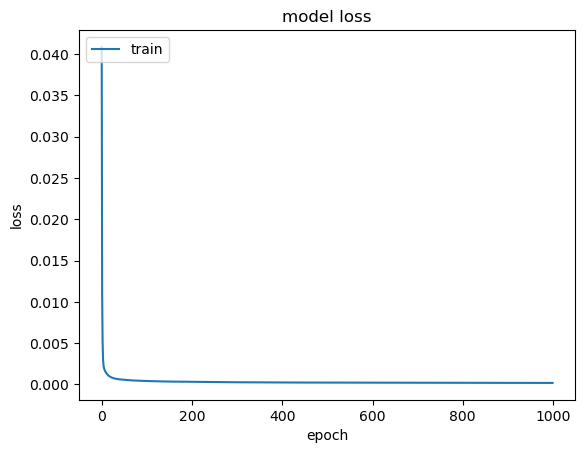

In [39]:
display.Image('./images/model_loss.png')

Graph 1

This graph of model loss demonstrates that our loss function flattens out very early. We do notice that the loss continues to decline *slightly* after abount 20 `epoch`, but most of the change happens from `epoch 1` through `epoch 20`.

The line representing the loss is incredibly smooth, which I believe signifies that the model is doing a good job of controlling the loss function. If there were spikes and valleys in the line I think that would represent the model struggling to minimize the loss.

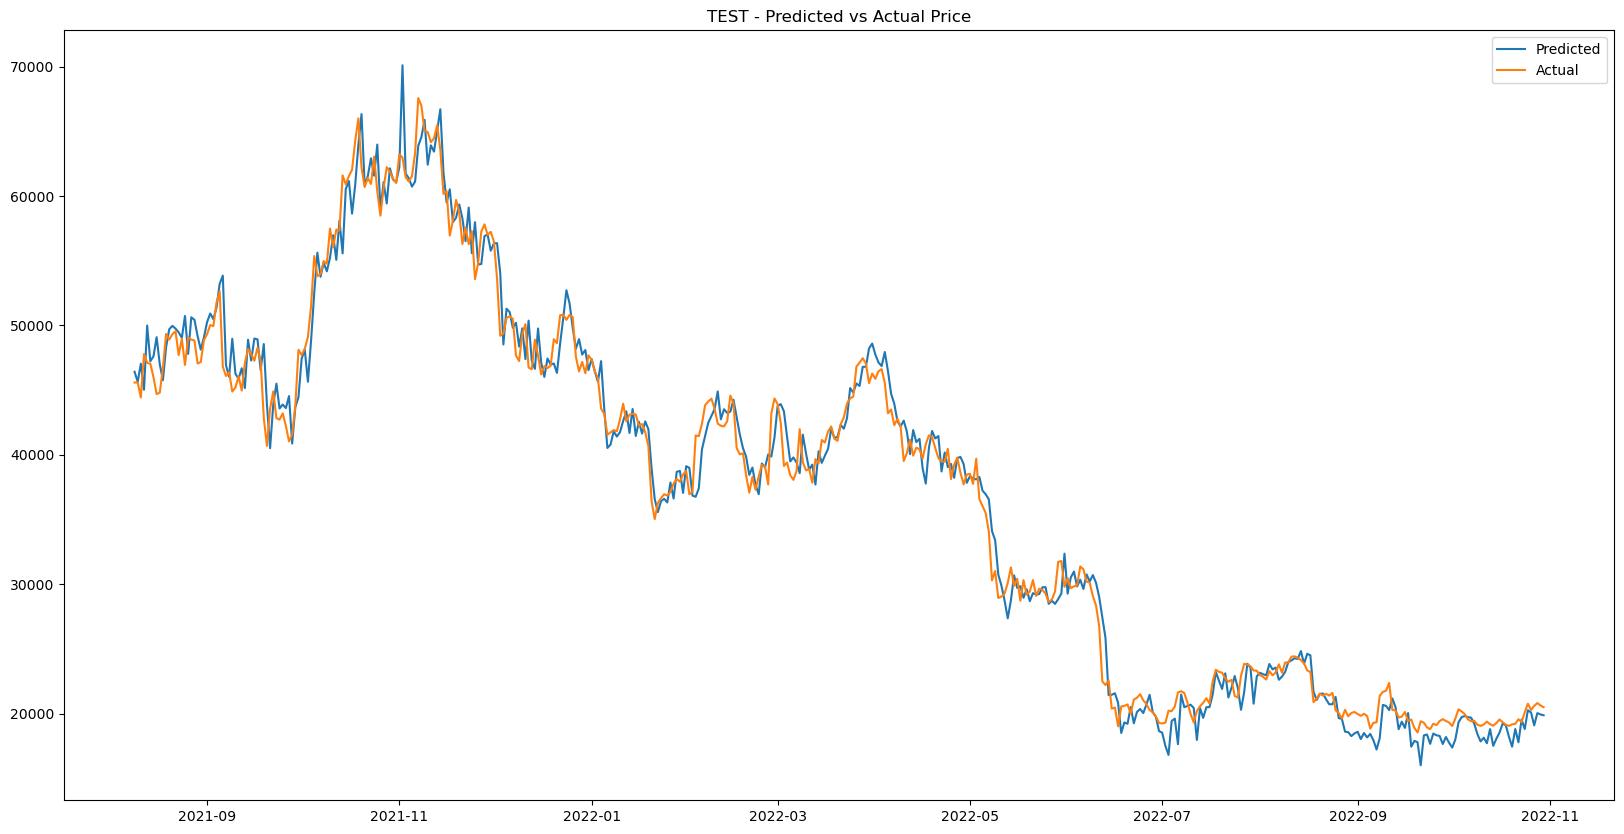

In [40]:
display.Image('./images/test_pred_vs_actual.png')

Graph 2

This graph of the sgd model's `predicted vs actual` test output is interesting for a number of reasons. We can see that the model is doing a pretty good job of making predictions. If we look closely (we'll 'zoom in' later) we can see that the predictions are *slightly* ahead the actual data much, but not all, of the time. This makes sense considering that we're trying to predict *tomorrow's* closing BTC price. The graph makes it look like the predictions are often one day ahead because we see the same patterns in the line, but shifted a little to the right.

We can see that the actual values are less extreme than the predicted ones. There are several instances (around November 2021, July 2022) where the predictions are significantly higher or lower than the actual price. We don't really see this trend working in the other direction.

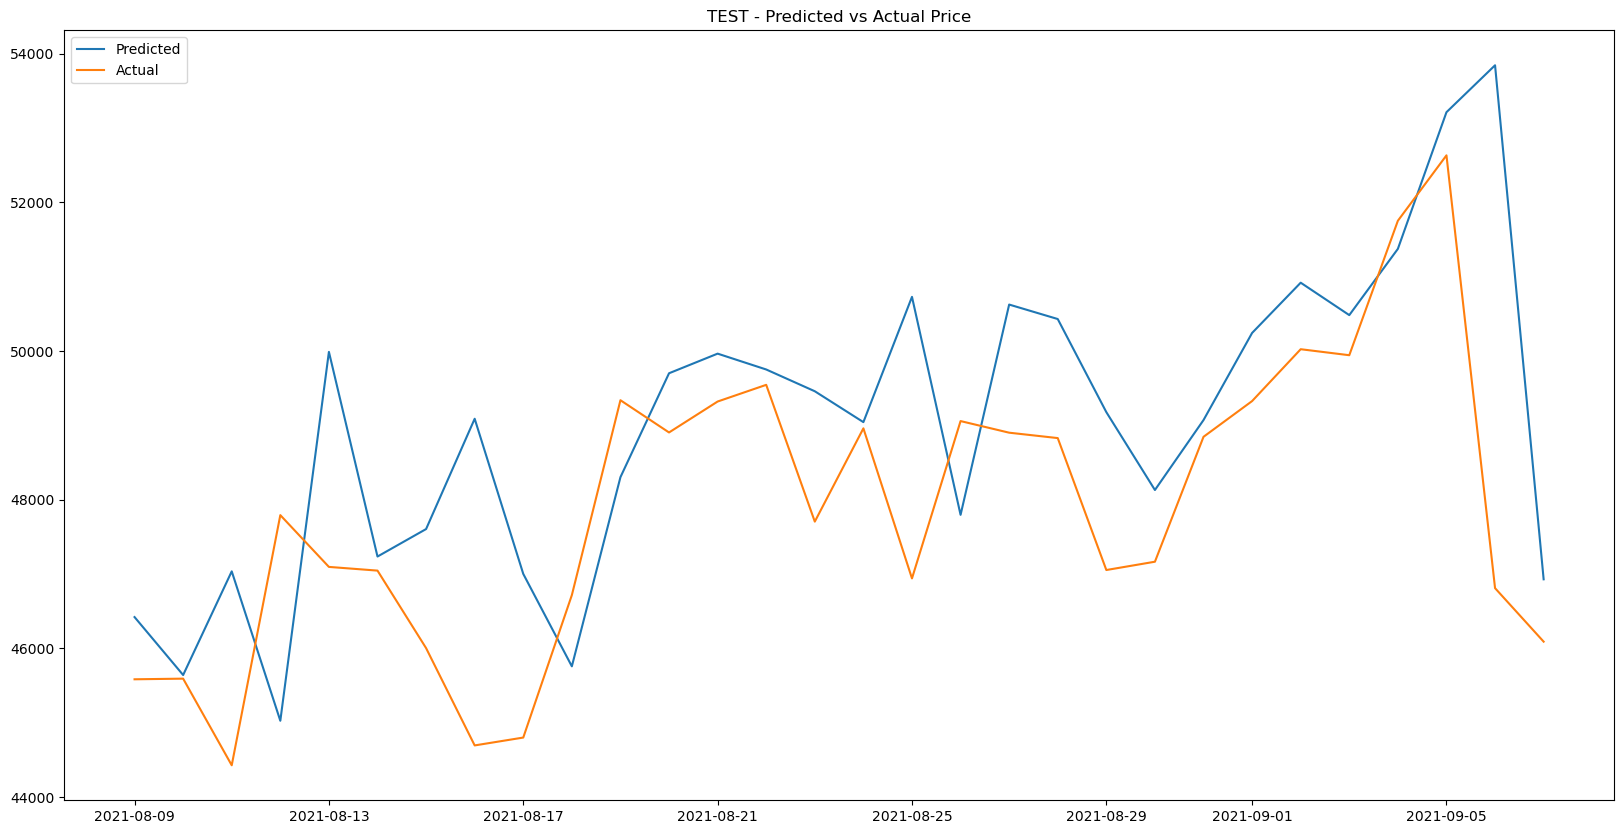

In [41]:
display.Image('./images/test_pred_vs_actual_zoomin.png')

Graph 3

Here we see a 'zoomed in' version of the above graph. This gives us a good visual on the 'delay' effect. It looks like the prediction line is often *just a little* ahead of the actual line.

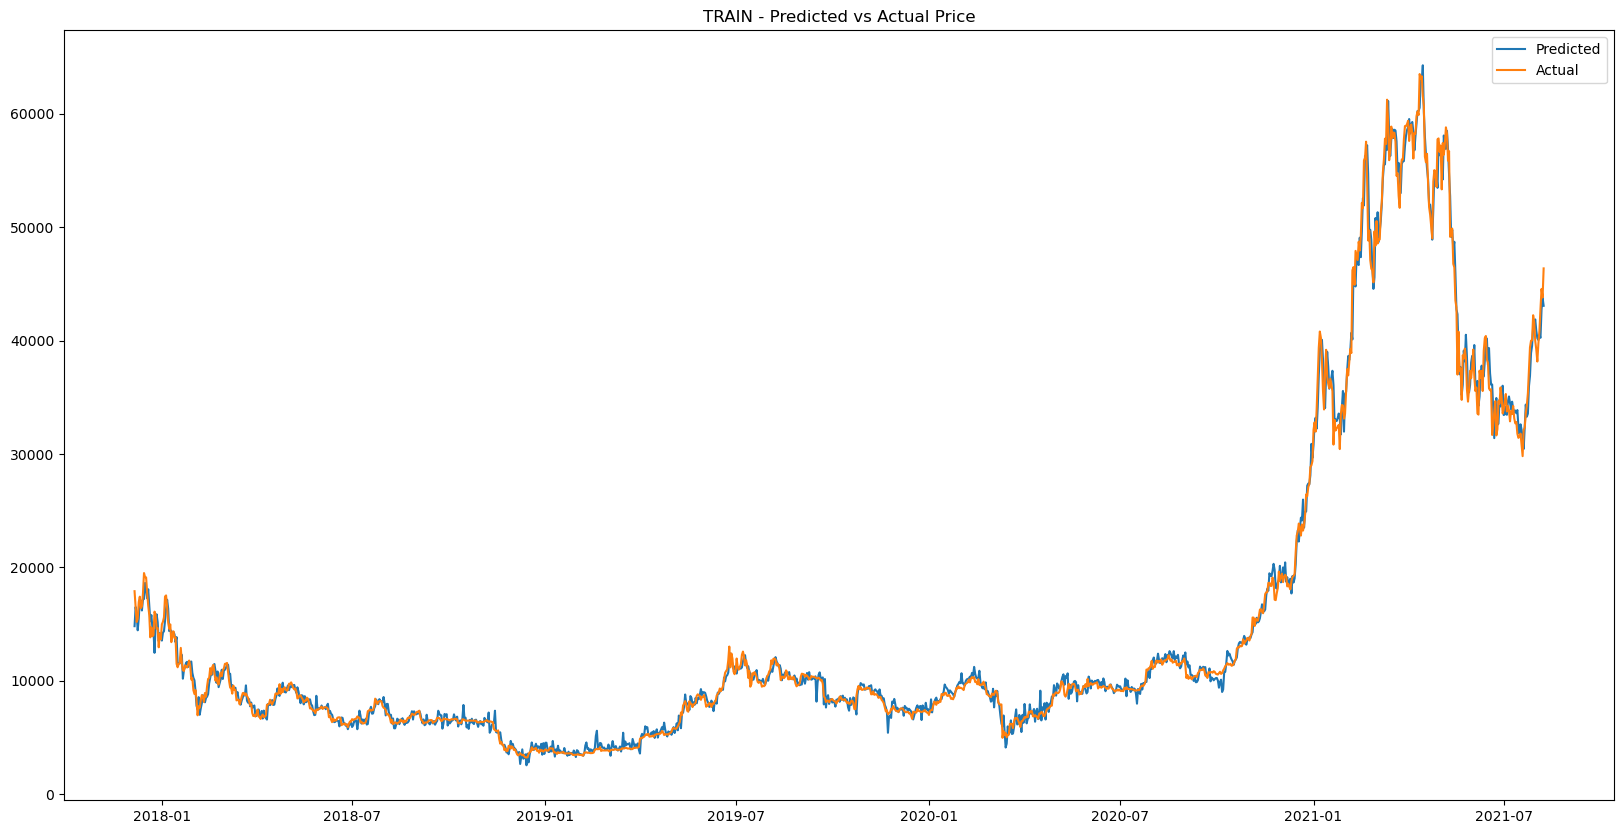

In [42]:
display.Image('./images/train_pred_vs_actual.png')

Graph 4

This graph of the sgd model's `predicted vs actual` train output demonstrates that our training is working well, if a little overfit. The predictions follow the actual outputs closely with a lot of variation in the data. We can see from the graph that the line representing predictions oscillates constantly, where the line representing the actual values is much smoother. The overfitting looks like it is the worst when the price goes higher, starting around January 2021. We almost lose the prediction line behind the actual line.

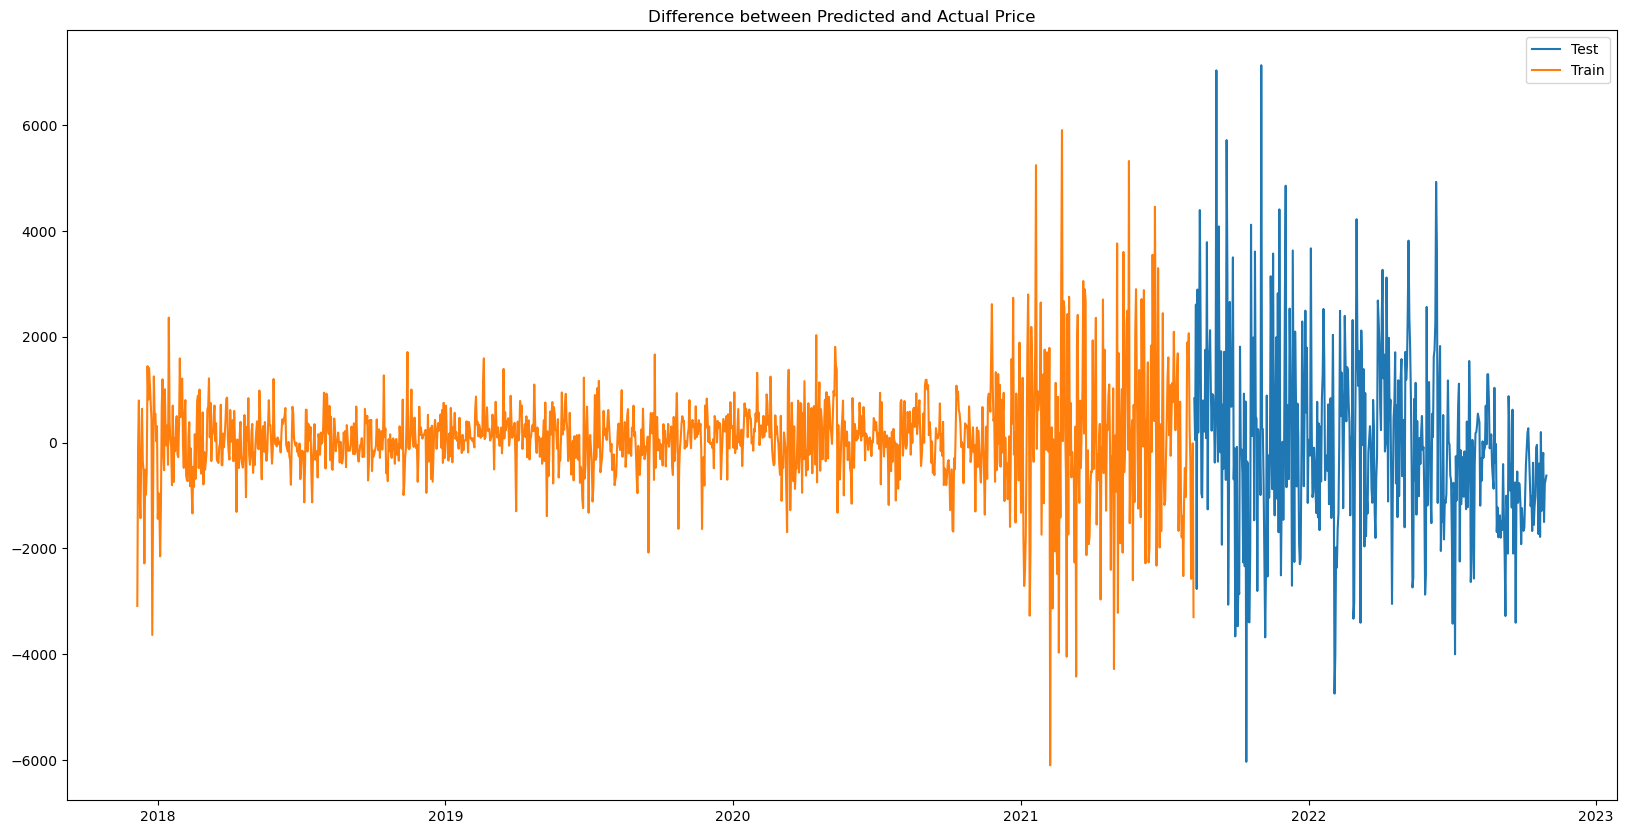

In [44]:
display.Image('./images/diff_test_vs_train.png')

Graph 5

This graph shows the `difference between predicted and actual` output for both traing (in orange) and test (in blue). This visualization conveniently shows how well the model is making predictions - the wider the range of values, the less well the model is performing. Predictably, the train data has a smaller variation than the test data, which demonstrates that the model performs better on the train data.

If the orange band were very narrow we would conclude that the model is overfitting. I do not believe that this model looks overfit by this measure - the orange band has a good deal of variation.

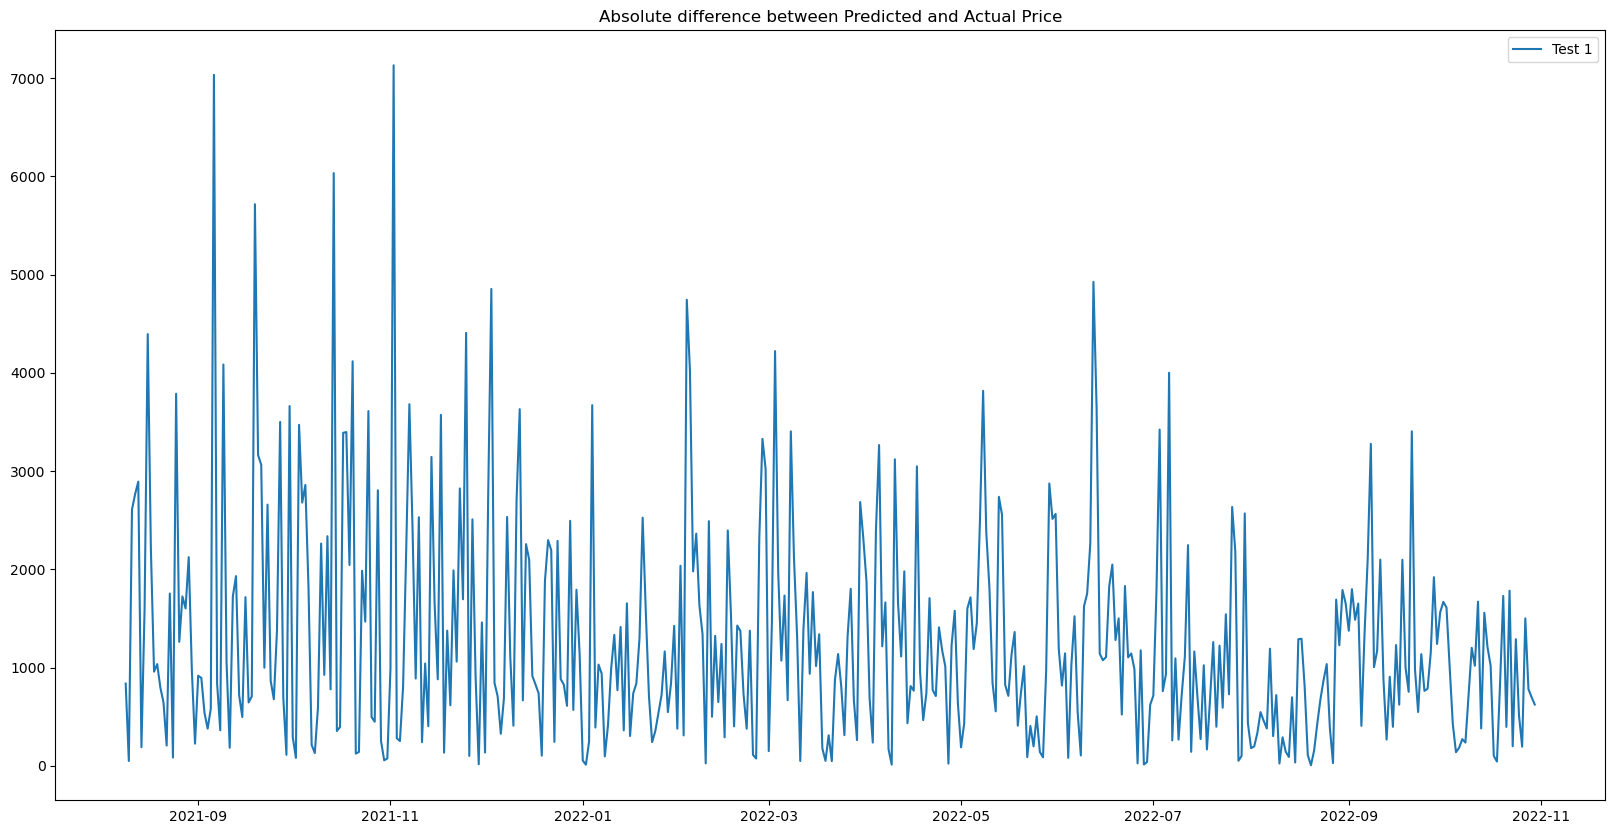

In [45]:
display.Image('./images/diff_abs_test.png')

Graph 6

This is a graph of the absolute difference between predicted and actual price values for the test set. Interestingly it looks like this absolute difference shrinks as time goes on. We can see that there are two spikes over 7,000 and otherwise the difference hovers around 1500. When I calculated the mean difference I found it to be `1286.7`.

We can see that there is consistent variation in this graph. Never does it ever smooth out or give much of any indication that it is headed in that direction. This represents volatility in the predictions.

### Discussion

Of all 7 optimizers I experimented with, `sgd` performed the best, obtaining an `mae` of `0.0166`. I think this value is good given the number (33) of inputs the model was working with. Based on the graphs of `Difference Between Predicted and Actual Price` (Graph 5) and `TRAIN - Predicted vs Actual Price` (Graph 4) I do not believe that this model is significantly overfit. The training data in graph 4 does look a little overfit at the very beginning and towards the end. I believe that Graph 2 (`TEST - Predicted vs Actual Price`) demonstrates that this model did a good job of making predictions for the test data. Overall I think this model performed well.

# Conclusion

### Data Collection

All in all our data collection hit about 66% of our original target. Though we weren't able to get the sentiment data we wanted, we got more than enough search trend and financial data to compensate. We do believe it would have been interesting to have had access to sentiment analysis data. We believe this data would have increased the accuracy of our network, though there is no way to know with any certainty whether or not it would have. We found that some search trend data was more useful that others and wound up removing many columns of the search trend data in order to increase the predictive accuracy of the model.

### Experiments

Each team member ran a related set of experiments resulting in 3 sets of experiments. The methodologies & results can be found above. In this section, we will try and tie these experiments together.

Eric built his experiments with the `adam` optimizer, which produced its best results with shuffled data. Matt did an experiment to find the best optimizer for the network, which other than a handful of input columns mirrored Eric's network. Matt found that the `sgd` optimizer outperformed the rest, and produced an `mae` half as large as the `adam` optimizer. It would be interesting to run Eric's experiment with the `sgd` optimizer to see if the conclusions of Matt's experiments lend themselves to Eric's by producing even more accurate predictions with the `sgd` optimizer.

The results of Kassidy's experiment demonstrate that keras networks outperformed the A4NeuralNetworksClass from class. This is likely due to the fact that the keras package has been developed by professionals for several years and includes optimizations that the A4NeuralNetworksClass does not. The intention was to use the A4NeuralNetworksClass as a basis of comparison for the keras network. We were also hoping to use a pytorch neural network to compare to keras and the A4NeuralNetworksClass, but were unable to get the pytorch package working in time.

### Wrapping Up

Ultimately we did produce a neural network which could be used to create a bot to predict tomorrow's price of Bitcoin, which could inform day trading of cryptocurrency. We believe that moving forward the ideal neural network would use the `sgd` optimizer and shuffled data. This network would need further refining to be consistently profitable. This further refinement would take the shape of additional experiments (trying different combinations of input data, different optimizers, etc...), and live testing (using the bot on today's data istead of strictly historical data).

We believe that integrating our experiments earlier would have helped our overall product, and doubtless made it easier to make this final notebook a little easier to read. We believe that we achieved our goal with this project, had a great time, and learned a lot.

## References

* [[Gallo, 2022](https://www.monkeydg.com/assets/docs/David_Gallo_MSc_Thesis.pdf)] "Algorithmic Cryptocurrency Trading using Sentiment Analysis and Dueling Double Deep Q-Networks." (2022)
* [[Colianni, et al., 2015](https://www.semanticscholar.org/paper/Algorithmic-Trading-of-Cryptocurrency-Based-on-Colianni-Rosales/9b838a3177523b8179511283b9489caa0f69910d)] Colianni, Stuart G. et al. "Algorithmic Trading of Cryptocurrency Based on Twitter Sentiment Analysis." (2015).
* [[Peng et al.2022](http://www.pertanika.upm.edu.my/resources/files/Pertanika%20PAPERS/JST%20Vol.%2030%20(4)%20Oct.%202022/22%20JST-3266-2021.pdf)] Peng, Aisha, Sau Loong Ang, and Chia Yean Lim. "Automated Cryptocurrency Trading Bot Implementing DRL."
* [[Singh, 2022](http://www.ijrbs.com/pdf/IJRBS%202022.pdf#page=91)] Singh, Gautam B. "A Deep Learning Architecture for Intelligently Trading Cryptocurrencies." Name Page No. 1. Establishing Sustainability Context: First Step for Businesses on their Sustainability Journey: 91.
* [[Nan, et al., 2022](https://link.springer.com/chapter/10.1007/978-3-031-12423-5_13)] Nan, Abhishek, Anandh Perumal, and Osmar R. Zaiane. "Sentiment and knowledge based algorithmic trading with deep reinforcement learning." International Conference on Database and Expert Systems Applications. Springer, Cham, 2022.
* [[Nametala, et al., 2021](https://link.springer.com/article/10.1007/s10614-021-10228-0)] Nametala, Ciniro AL, et al. "Use of Econometric Predictors and Artificial Neural Networks for the Construction of Stock Market Investment Bots." Computational Economics (2022): 1-31.
* [Granger, 1980], Granger, C. (1980). Testing for causality. Journal of Economic Dynamics and Control, 2 ,
329–352. doi: 10.1016/0165-1889(80)90069-x

In [55]:
import io
import nbformat
import glob
nbfile = glob.glob('ProjectReport.ipynb')
if len(nbfile) > 1:
    print('More than one ipynb file. Using the first one.  nbfile=', nbfile)
with io.open(nbfile[0], 'r', encoding='utf-8') as f:
    nb = nbformat.read(f, nbformat.NO_CONVERT)
word_count = 0
for cell in nb.cells:
    if cell.cell_type == "markdown":
        word_count += len(cell['source'].replace('#', '').lstrip().split(' '))
print('Word count for file', nbfile[0], 'is', word_count)

Word count for file ProjectReport.ipynb is 7971
